# Preparação do ambiente

## Instalação de bibliotecas, funções, inicialização das variáveis e criação dos Dataframes iniciais
Instalaremos as bibliotecas desscritas abaixo:
- A biblioteca **pandas** é utilizada no tratamento de dados, com criação e manipulação de dataframes robustos.
- A biblioteca **yfinance** permite o acesso aos dados do Yahoo Finance para que recuperemos os dados de ações que serão alvo de nossa análise.

In [1]:
!pip install pandas
!pip install yfinance --upgrade --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gabriella\AppData\Roaming\Python\Python310\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Coleta no Yahoo! Finanças os dados da ITUB4

In [3]:
itub = yf.download(tickers='ITUB4.SA',start='2019-01-01', end='2023-12-31')
itub

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,30.374891,25581700
2019-01-03,36.750000,37.610001,36.450001,37.610001,30.875679,21938600
2019-01-04,37.220001,37.709999,36.750000,36.980000,30.358479,24873500
2019-01-07,36.799999,37.500000,36.750000,37.049999,30.415960,16901100
2019-01-08,37.180000,37.570000,36.560001,37.520000,30.801798,19556300
...,...,...,...,...,...,...
2023-12-21,32.750000,32.869999,32.549999,32.790001,32.772964,21813000
2023-12-22,32.820000,33.540001,32.799999,33.310001,33.292694,32650500
2023-12-26,33.369999,33.779999,33.230000,33.650002,33.632519,23135400


In [4]:
itub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2019-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1241 non-null   float64
 1   High       1241 non-null   float64
 2   Low        1241 non-null   float64
 3   Close      1241 non-null   float64
 4   Adj Close  1241 non-null   float64
 5   Volume     1241 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.9 KB


In [5]:
itub.rename(
    columns = {
        'Open': 'Abertura', 
        'Close':'Fechamento', 
        'Low':'Mínima', 
        'High':'Máxima', 
        'Adj Close':'Fech. Ajustado', 
        'Vol': 'Volume'
    }, 
    inplace=True)
itub.rename_axis('Data', axis=0, inplace=True)

In [6]:
itub

,Abertura,Máxima,Mínima,Fechamento,Fech. Ajustado,Volume
Data,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,30.374891,25581700
2019-01-03,36.750000,37.610001,36.450001,37.610001,30.875679,21938600
2019-01-04,37.220001,37.709999,36.750000,36.980000,30.358479,24873500
2019-01-07,36.799999,37.500000,36.750000,37.049999,30.415960,16901100
2019-01-08,37.180000,37.570000,36.560001,37.520000,30.801798,19556300
...,...,...,...,...,...,...
2023-12-21,32.750000,32.869999,32.549999,32.790001,32.772964,21813000
2023-12-22,32.820000,33.540001,32.799999,33.310001,33.292694,32650500
2023-12-26,33.369999,33.779999,33.230000,33.650002,33.632519,23135400


In [7]:
itub=itub.drop(columns=['Fech. Ajustado'])

In [8]:
itub.index.duplicated().sum()

0

In [9]:
itub.isnull().sum()

Abertura      0
Máxima        0
Mínima        0
Fechamento    0
Volume        0
dtype: int64

In [10]:
itub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2019-01-02 to 2023-12-28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Abertura    1241 non-null   float64
 1   Máxima      1241 non-null   float64
 2   Mínima      1241 non-null   float64
 3   Fechamento  1241 non-null   float64
 4   Volume      1241 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.5 KB


In [11]:
itub.describe()

,Abertura,Máxima,Mínima,Fechamento,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,28.609073,28.983376,28.223118,28.592490,3.285983e+07
std,4.436100,4.438468,4.419797,4.439046,1.589375e+07
min,21.170000,21.309999,20.000000,20.520000,7.774500e+06
25%,25.110001,25.510000,24.760000,25.100000,2.205190e+07
50%,27.570000,27.940001,27.230000,27.600000,2.988150e+07
75%,32.049999,32.389999,31.639999,32.029999,4.041950e+07
max,38.669998,39.790001,38.400002,39.689999,1.606699e+08


### Dataframes Dólar e IFNC

#### Dataframes - Dólas e IFNC

In [12]:
DOLAR = './USD_BRL_Dados_Hist.csv' #Dolar do Investing
IFNC = './IFNC-Dados_Hist.csv' #IFNC do Investing

In [13]:
dolar = pd.read_csv(DOLAR)

ifnc = pd.read_csv(IFNC)

In [14]:
dolar

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.12.2023,"4,8521","4,8323","4,8714","4,8175",NaN,"0,53%"
1,27.12.2023,"4,8267","4,8107","4,8408","4,8018",NaN,"0,26%"
2,26.12.2023,"4,8140","4,8513","4,8614","4,8135",NaN,"-0,92%"
3,22.12.2023,"4,8585","4,8865","4,8908","4,8481",NaN,"-0,53%"
4,21.12.2023,"4,8844","4,9146","4,9146","4,8633",NaN,"-0,65%"
...,...,...,...,...,...,...,...
1294,07.01.2019,"3,7356","3,7139","3,7384","3,6898","44,59K","0,54%"
1295,04.01.2019,"3,7155","3,7593","3,7850","3,7088","56,28K","-1,09%"
1296,03.01.2019,"3,7565","3,7960","3,8074","3,7376","55,71K","-0,88%"
1297,02.01.2019,"3,7900","3,8786","3,8971","3,7828","44,05K","-2,35%"


In [15]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1299 non-null   object
 1   Último    1299 non-null   object
 2   Abertura  1299 non-null   object
 3   Máxima    1299 non-null   object
 4   Mínima    1299 non-null   object
 5   Vol.      1032 non-null   object
 6   Var%      1299 non-null   object
dtypes: object(7)
memory usage: 71.2+ KB


In [16]:
ifnc

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.12.2023,"13.803,59","13.756,28","13.806,39","13.724,83",NaN,"0,34%"
1,27.12.2023,"13.756,28","13.710,67","13.775,54","13.662,31",NaN,"0,33%"
2,26.12.2023,"13.710,67","13.604,01","13.731,53","13.599,49",NaN,"0,78%"
3,22.12.2023,"13.604,01","13.508,82","13.655,96","13.474,94",NaN,"0,75%"
4,21.12.2023,"13.502,46","13.423,47","13.528,23","13.422,30",NaN,"0,59%"
...,...,...,...,...,...,...,...
1237,08.01.2019,"10.648,66","10.611,79","10.667,06","10.444,01",NaN,"0,35%"
1238,07.01.2019,"10.611,79","10.595,91","10.712,08","10.540,33",NaN,"0,17%"
1239,04.01.2019,"10.594,19","10.708,01","10.784,71","10.539,94",NaN,"-1,06%"
1240,03.01.2019,"10.708,01","10.564,67","10.708,01","10.481,98",NaN,"1,36%"


In [17]:
ifnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1242 non-null   object 
 1   Último    1242 non-null   object 
 2   Abertura  1242 non-null   object 
 3   Máxima    1242 non-null   object 
 4   Mínima    1242 non-null   object 
 5   Vol.      0 non-null      float64
 6   Var%      1242 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.0+ KB


### Função

In [18]:
## A função converte a variação em dados numéricos.
def converte_dados_investing(dado: str):
  if pd.notna(dado):  # Verifica se o valor é um número
    if dado.endswith('%'):
      return float(dado[:-1].replace(',', '.'))/100
    else:
      return dado
  else:
    return dado

### Dolar e IFNC tratados

In [19]:
# Utilizamos o parâmetro 'decimal=","' para definir que a vírgula 
# seria o separador de casas decimais nos dados. 
# Inicializando os dataframes com o conversor e renomeando as colunas

dolar = pd.read_csv(
    DOLAR, 
    decimal=",", 
    skiprows=1,
    index_col='Data',
    parse_dates=[0],
    date_parser=(lambda data: datetime.strptime(data, '%d.%m.%Y')),
    names=['Data', 'Fechamento', 'Abertura', 'Máxima', 'Mínima', 'Volume', 'Variação'],
    converters={'Variação': converte_dados_investing},
    dtype={
        'Abertura': np.float64, 
        'Fechamento': np.float64, 
        'Mínima': np.float64, 
        'Máxima': np.float64
    },
    thousands='.'
)

ifnc = pd.read_csv(
    IFNC, 
    decimal=",",
    skiprows=1,
    index_col='Data',
    parse_dates=[0],
    date_parser=(lambda data: datetime.strptime(data, '%d.%m.%Y')),
    names=['Data', 'Fechamento', 'Abertura', 'Máxima', 'Mínima', 'Volume', 'Variação'],
    converters={'Variação': converte_dados_investing},
    dtype={
        'Abertura': np.float64, 
        'Fechamento': np.float64, 
        'Mínima': np.float64, 
        'Máxima': np.float64
    },
    thousands='.'
)

In [20]:
dolar

,Fechamento,Abertura,Máxima,Mínima,Volume,Variação
Data,,,,,,
2023-12-28,4.8521,4.8323,4.8714,4.8175,NaN,0.0053
2023-12-27,4.8267,4.8107,4.8408,4.8018,NaN,0.0026
2023-12-26,4.8140,4.8513,4.8614,4.8135,NaN,-0.0092
2023-12-22,4.8585,4.8865,4.8908,4.8481,NaN,-0.0053
2023-12-21,4.8844,4.9146,4.9146,4.8633,NaN,-0.0065
...,...,...,...,...,...,...
2019-01-07,3.7356,3.7139,3.7384,3.6898,"44,59K",0.0054
2019-01-04,3.7155,3.7593,3.7850,3.7088,"56,28K",-0.0109
2019-01-03,3.7565,3.7960,3.8074,3.7376,"55,71K",-0.0088


In [21]:
dolar=dolar.drop(columns=['Volume'])

In [22]:
dolar.index.duplicated().sum()

0

In [23]:
dolar.isnull().sum()

Fechamento    0
Abertura      0
Máxima        0
Mínima        0
Variação      0
dtype: int64

In [24]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1299 entries, 2023-12-28 to 2019-01-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1299 non-null   float64
 1   Abertura    1299 non-null   float64
 2   Máxima      1299 non-null   float64
 3   Mínima      1299 non-null   float64
 4   Variação    1299 non-null   float64
dtypes: float64(5)
memory usage: 93.2 KB


In [25]:
dolar.describe()

,Fechamento,Abertura,Máxima,Mínima,Variação
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,4.930544,4.930106,4.967668,4.893817,0.000224
std,0.577376,0.578343,0.586512,0.568749,0.010267
min,3.644000,3.645500,3.682200,3.635800,-0.045800
25%,4.724350,4.709650,4.756450,4.687400,-0.006200
50%,5.116200,5.117300,5.159900,5.072300,0.000000
75%,5.331350,5.328850,5.380150,5.281150,0.006000
max,5.885600,5.924800,5.971800,5.817600,0.037300


In [26]:
ifnc

,Fechamento,Abertura,Máxima,Mínima,Volume,Variação
Data,,,,,,
2023-12-28,13803.59,13756.28,13806.39,13724.83,NaN,0.0034
2023-12-27,13756.28,13710.67,13775.54,13662.31,NaN,0.0033
2023-12-26,13710.67,13604.01,13731.53,13599.49,NaN,0.0078
2023-12-22,13604.01,13508.82,13655.96,13474.94,NaN,0.0075
2023-12-21,13502.46,13423.47,13528.23,13422.30,NaN,0.0059
...,...,...,...,...,...,...
2019-01-08,10648.66,10611.79,10667.06,10444.01,NaN,0.0035
2019-01-07,10611.79,10595.91,10712.08,10540.33,NaN,0.0017
2019-01-04,10594.19,10708.01,10784.71,10539.94,NaN,-0.0106


In [27]:
ifnc=ifnc.drop(columns=['Volume'])

In [28]:
ifnc.index.duplicated().sum()

0

In [29]:
ifnc.isnull().sum()

Fechamento    0
Abertura      0
Máxima        0
Mínima        0
Variação      0
dtype: int64

In [30]:
ifnc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2023-12-28 to 2019-01-02
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1242 non-null   float64
 1   Abertura    1242 non-null   float64
 2   Máxima      1242 non-null   float64
 3   Mínima      1242 non-null   float64
 4   Variação    1242 non-null   float64
dtypes: float64(5)
memory usage: 90.5 KB


In [31]:
ifnc.describe()

,Fechamento,Abertura,Máxima,Mínima,Variação
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,11021.560169,11018.788366,11148.154686,10893.892351,0.000433
std,1172.828865,1170.468520,1148.717361,1187.435935,0.019083
min,6926.180000,6929.340000,7568.600000,6817.250000,-0.132800
25%,10221.375000,10216.885000,10355.685000,10053.610000,-0.009875
50%,11091.295000,11091.030000,11201.065000,10962.620000,0.000850
75%,11888.537500,11884.322500,12022.490000,11774.367500,0.011000
max,13803.590000,13756.280000,13806.390000,13724.830000,0.131500


# Análise dos dados

## Gráficos ITUB4

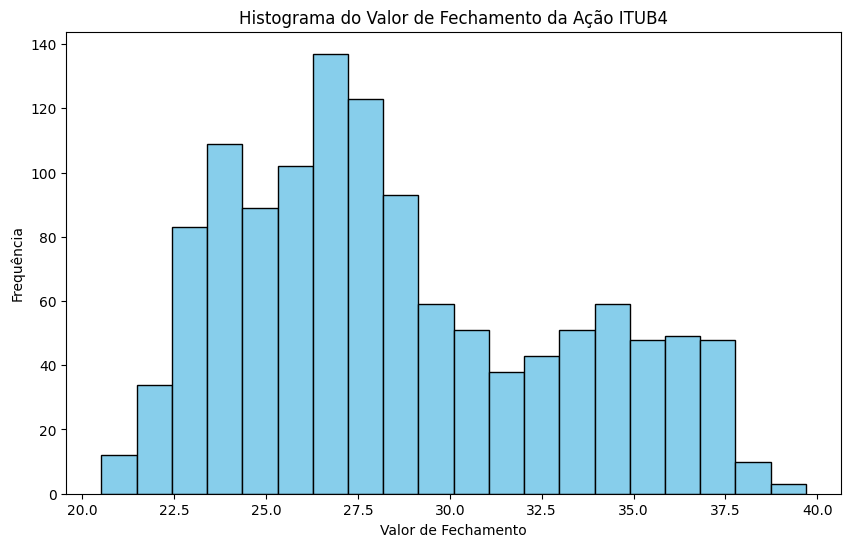

In [32]:
# Crie um histograma do valor de fechamento da ação
plt.figure(figsize=(10, 6))
plt.hist(itub['Fechamento'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma do Valor de Fechamento da Ação ITUB4')
plt.xlabel('Valor de Fechamento')
plt.ylabel('Frequência')
plt.show()

<AxesSubplot: xlabel='Data'>

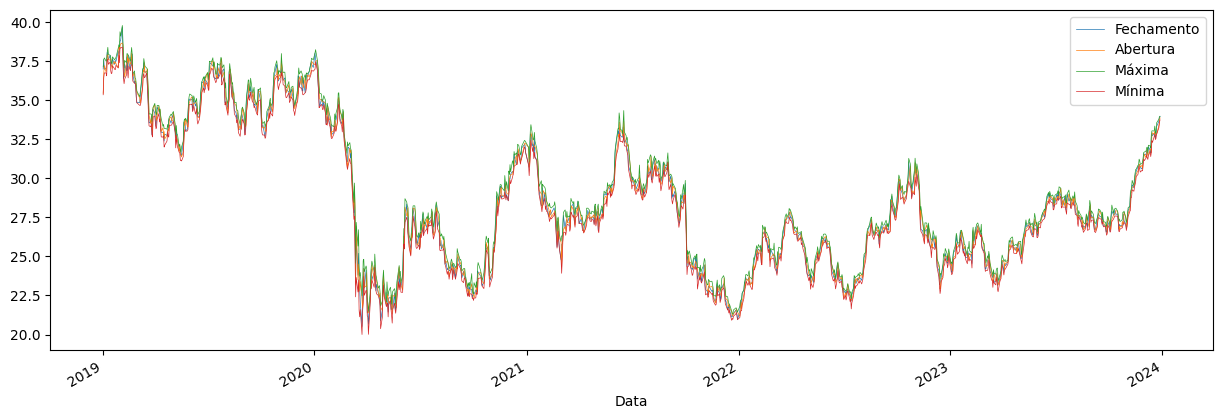

In [33]:
itub[['Fechamento', 'Abertura', 'Máxima', 'Mínima']].plot.line(figsize=(15,5), linewidth=0.5)

<AxesSubplot: >

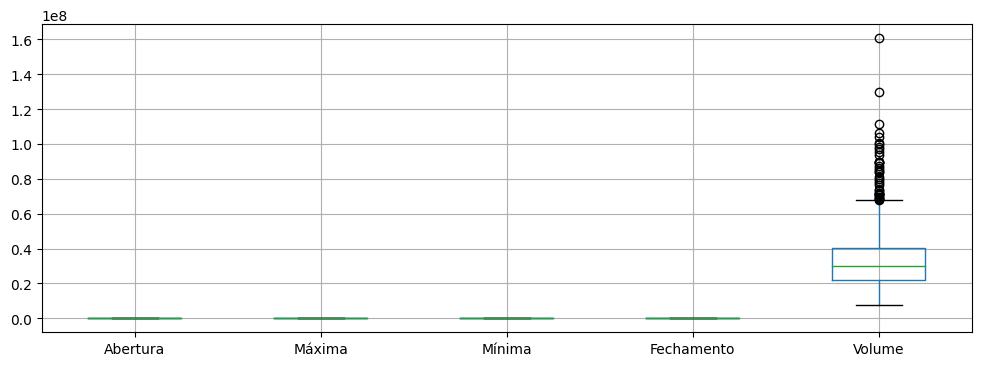

In [34]:
itub.boxplot(figsize=(12,4))

<AxesSubplot: >

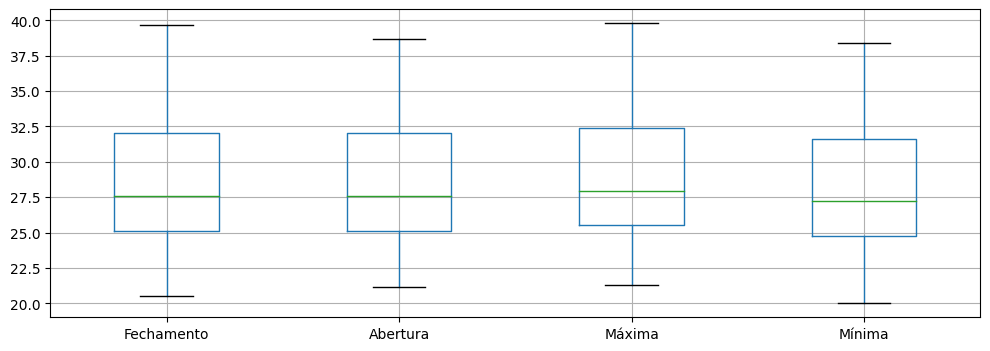

In [35]:
itub[['Fechamento', 'Abertura', 'Máxima', 'Mínima']].boxplot(figsize=(12,4))

## Boxplot Dólar e IFNC

<AxesSubplot: >

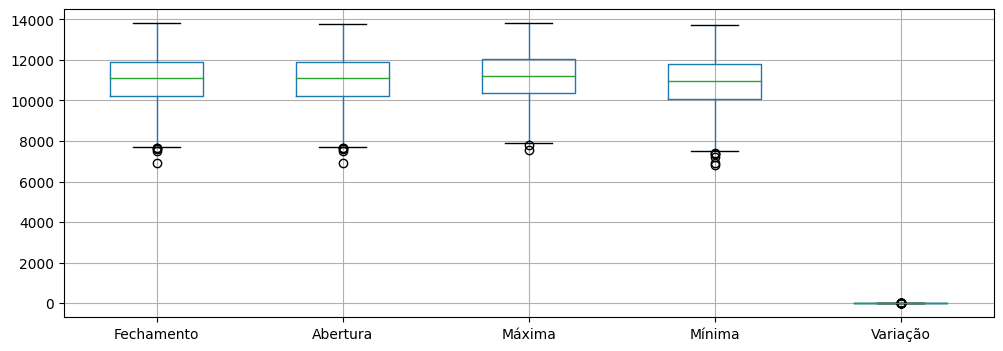

In [36]:
ifnc.boxplot(figsize=(12,4))

<AxesSubplot: >

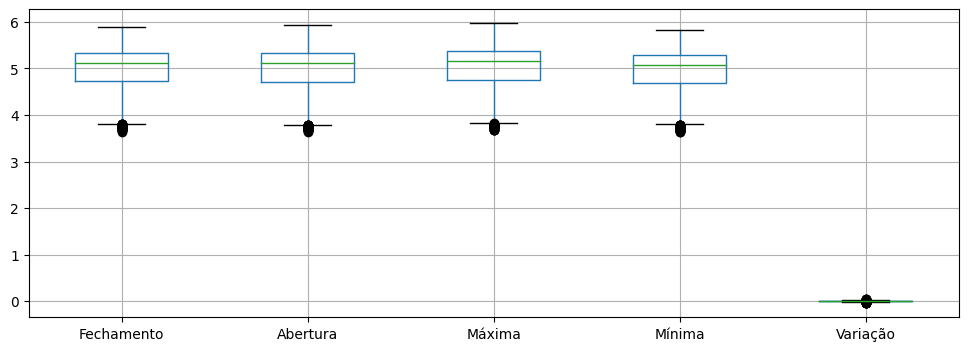

In [37]:
dolar.boxplot(figsize=(12,4))

## Gráficos de fechamentos

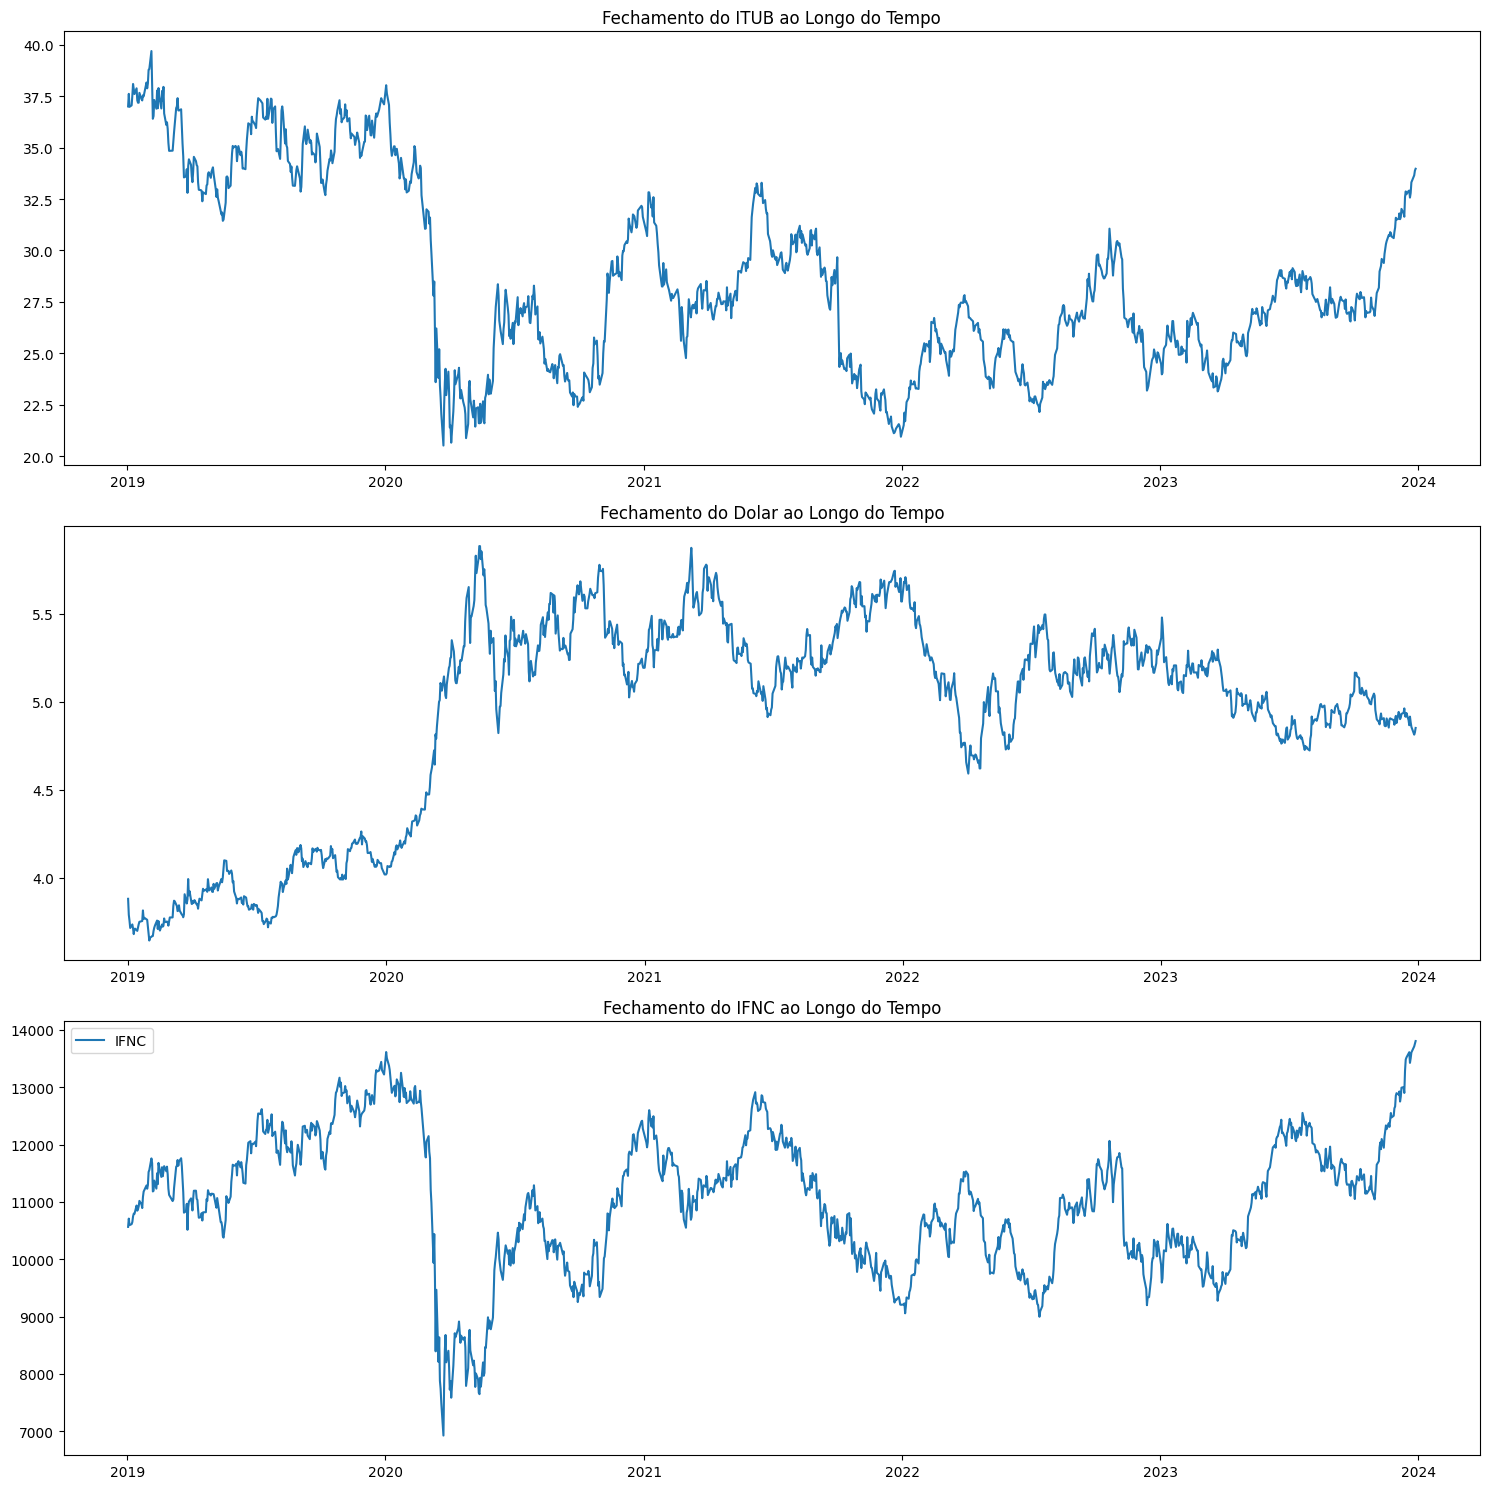

In [38]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(itub.index, itub['Fechamento'], label='ITUB')
plt.title('Fechamento do ITUB ao Longo do Tempo')

plt.subplot(3, 1, 2)
plt.plot(dolar.index, dolar['Fechamento'], label='Dolar')
plt.title('Fechamento do Dolar ao Longo do Tempo')

plt.subplot(3, 1, 3)
plt.plot(ifnc.index, ifnc['Fechamento'], label='IFNC')
plt.title('Fechamento do IFNC ao Longo do Tempo')

plt.legend()
plt.tight_layout()
plt.show()

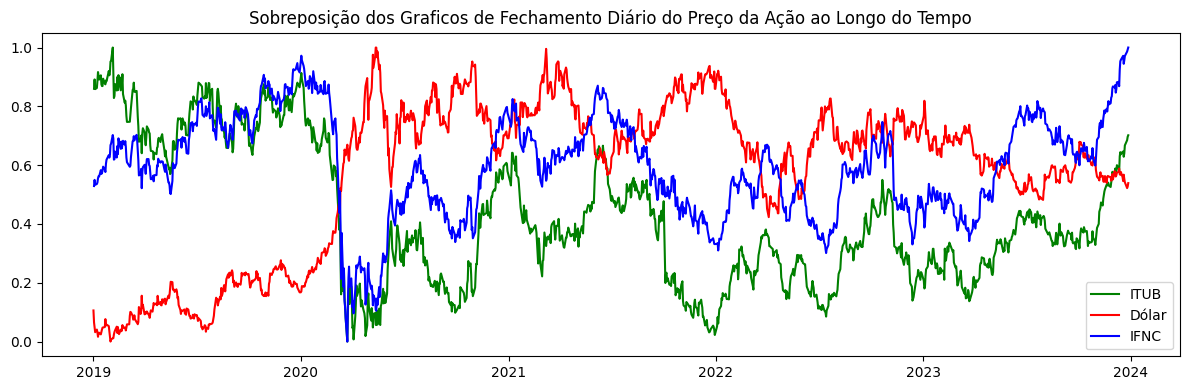

In [39]:
plt.figure(figsize=(12, 4))

plt.plot(itub.index, ((itub['Fechamento'] - itub['Fechamento'].min())/(itub['Fechamento'].max() - itub['Fechamento'].min())), label='ITUB', color='green')
plt.plot(dolar.index, ((dolar['Fechamento'] - dolar['Fechamento'].min())/(dolar['Fechamento'].max() - dolar['Fechamento'].min())), label='Dólar', color='red')
plt.plot(ifnc.index, ((ifnc['Fechamento'] - ifnc['Fechamento'].min())/(ifnc['Fechamento'].max() - ifnc['Fechamento'].min())), label='IFNC', color='blue')
plt.title('Sobreposição dos Graficos de Fechamento Diário do Preço da Ação ao Longo do Tempo')
plt.legend()
plt.tight_layout()
plt.show()


# Junção e novas variáveis

## Novas variáveis

In [40]:
# Variação de ITUB4
itub['Variação'] = itub['Fechamento'].pct_change()

# Médias móveis de ITUB4
itub['M7'] = itub['Fechamento'].rolling(7).mean()
itub['M21'] = itub['Fechamento'].rolling(21).mean()
#
# Cálculo do MCAD de ITUB4
itub['MCAD'] = itub['Fechamento'].ewm(span=12, adjust=False).mean()- itub['Fechamento'].ewm(span=26, adjust=False).mean()
# Calcular a Linha de sinal

itub['Linha_Sinal_MCAD'] = itub['MCAD'].ewm(span=9, adjust=False).mean()

## Calcular as mudanças nos preços : df['Fechamento'].diff()

# Calcular os ganhos e as perdas de ITUB4
ganhos = itub['Fechamento'].diff().apply(lambda x: x if x > 0 else 0)
perdas = -itub['Fechamento'].diff().apply(lambda x: x if x < 0 else 0)

# Calcular o RSI de ITUB4

itub['RSI'] = 100 - (100 / (1 + (ganhos.ewm(span=14, adjust=False).mean() / perdas.ewm(span=14, adjust=False).mean())))

itub

,Abertura,Máxima,Mínima,Fechamento,Volume,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI
Data,,,,,,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,25581700,NaN,NaN,NaN,0.000000,0.000000,NaN
2019-01-03,36.750000,37.610001,36.450001,37.610001,21938600,0.016487,NaN,NaN,0.048661,0.009732,100.000000
2019-01-04,37.220001,37.709999,36.750000,36.980000,24873500,-0.016751,NaN,NaN,0.035975,0.014981,45.627140
2019-01-07,36.799999,37.500000,36.750000,37.049999,16901100,0.001893,NaN,NaN,0.031209,0.018226,49.170390
2019-01-08,37.180000,37.570000,36.560001,37.520000,19556300,0.012686,NaN,NaN,0.064613,0.027504,66.223013
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,32.750000,32.869999,32.549999,32.790001,21813000,0.006755,32.765714,31.834762,0.839078,0.866250,67.413440
2023-12-22,32.820000,33.540001,32.799999,33.310001,32650500,0.015859,32.867143,31.951905,0.853825,0.863765,75.355843
2023-12-26,33.369999,33.779999,33.230000,33.650002,23135400,0.010207,32.978572,32.093333,0.882771,0.867567,79.183585


### Gráfico com novas variáveis

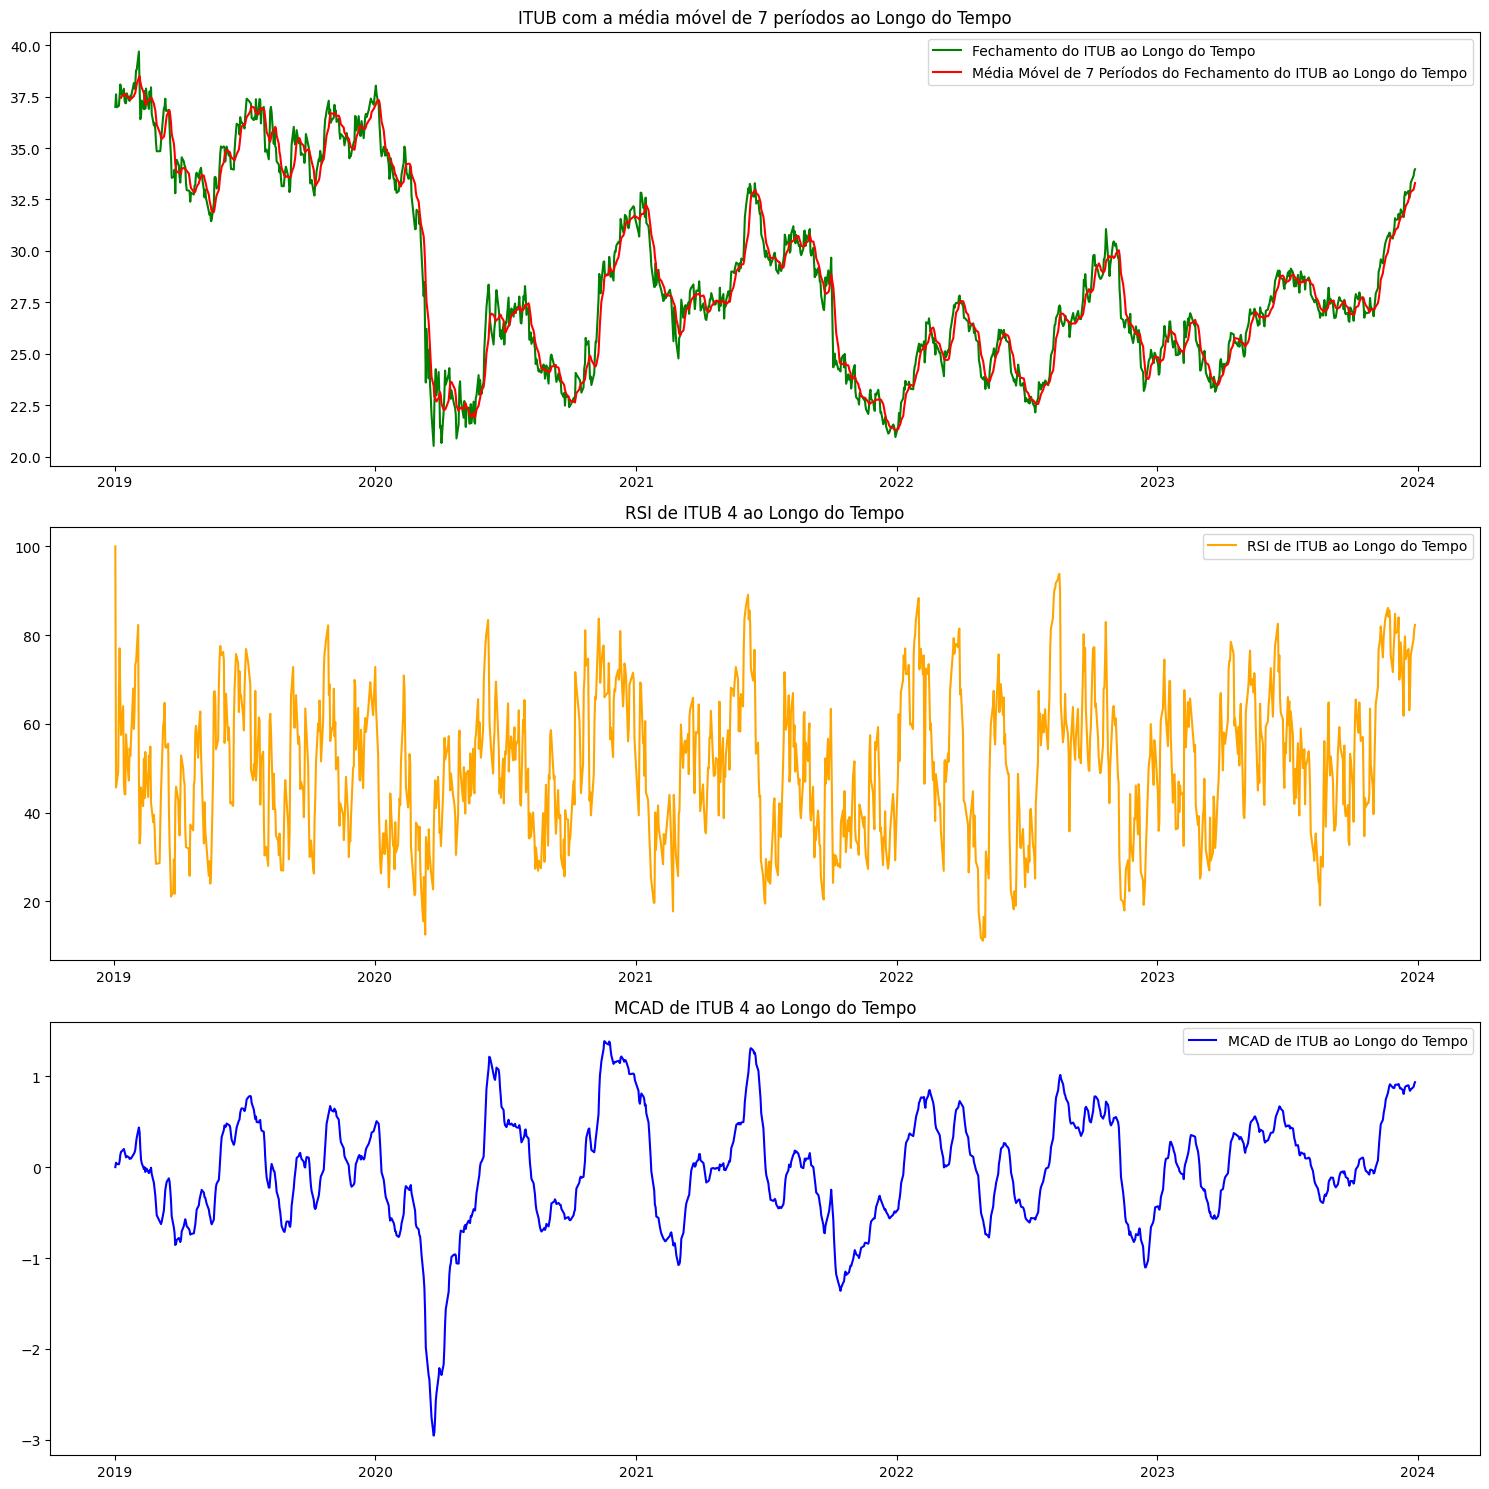

In [41]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(itub.index, itub['Fechamento'] , label='Fechamento do ITUB ao Longo do Tempo', color='green')
plt.plot(itub.index, itub['M7'] , label='Média Móvel de 7 Períodos do Fechamento do ITUB ao Longo do Tempo', color='red')

plt.title('ITUB com a média móvel de 7 períodos ao Longo do Tempo')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(itub.index, itub['RSI'] , label='RSI de ITUB ao Longo do Tempo', color='orange')
plt.title('RSI de ITUB 4 ao Longo do Tempo')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(itub.index, itub['MCAD'] , label='MCAD de ITUB ao Longo do Tempo', color='blue')
plt.title('MCAD de ITUB 4 ao Longo do Tempo')
plt.legend()
plt.tight_layout()
plt.show()

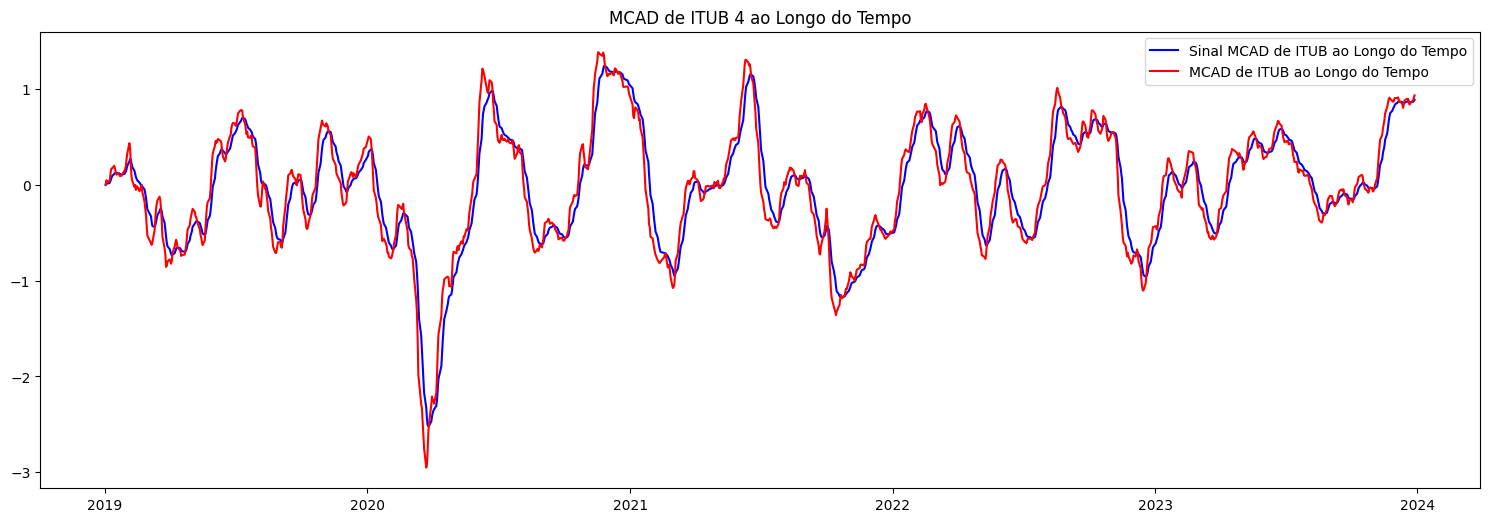

In [42]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(itub.index, itub['Linha_Sinal_MCAD'] , label='Sinal MCAD de ITUB ao Longo do Tempo', color='blue')
plt.plot(itub.index, itub['MCAD'] , label='MCAD de ITUB ao Longo do Tempo', color='red')
plt.title('MCAD de ITUB 4 ao Longo do Tempo')
plt.legend()
plt.tight_layout()
plt.show()

## Junção

In [43]:
df = pd.merge(itub, dolar, on='Data', how='inner', suffixes=('','_Dolar'))
df = pd.merge(df, ifnc, on='Data', how='inner', suffixes=('','_IFNC'))

df

,Abertura,Máxima,Mínima,Fechamento,Volume,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,...,Fechamento_Dolar,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC
Data,,,,,,,,,,,,,,,,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,25581700,NaN,NaN,NaN,0.000000,0.000000,...,3.7900,3.8786,3.8971,3.7828,-0.0235,10564.18,10126.79,10620.45,10117.43,0.0432
2019-01-03,36.750000,37.610001,36.450001,37.610001,21938600,0.016487,NaN,NaN,0.048661,0.009732,...,3.7565,3.7960,3.8074,3.7376,-0.0088,10708.01,10564.67,10708.01,10481.98,0.0136
2019-01-04,37.220001,37.709999,36.750000,36.980000,24873500,-0.016751,NaN,NaN,0.035975,0.014981,...,3.7155,3.7593,3.7850,3.7088,-0.0109,10594.19,10708.01,10784.71,10539.94,-0.0106
2019-01-07,36.799999,37.500000,36.750000,37.049999,16901100,0.001893,NaN,NaN,0.031209,0.018226,...,3.7356,3.7139,3.7384,3.6898,0.0054,10611.79,10595.91,10712.08,10540.33,0.0017
2019-01-08,37.180000,37.570000,36.560001,37.520000,19556300,0.012686,NaN,NaN,0.064613,0.027504,...,3.7133,3.7373,3.7412,3.7034,-0.0060,10648.66,10611.79,10667.06,10444.01,0.0035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,32.750000,32.869999,32.549999,32.790001,21813000,0.006755,32.765714,31.834762,0.839078,0.866250,...,4.8844,4.9146,4.9146,4.8633,-0.0065,13502.46,13423.47,13528.23,13422.30,0.0059
2023-12-22,32.820000,33.540001,32.799999,33.310001,32650500,0.015859,32.867143,31.951905,0.853825,0.863765,...,4.8585,4.8865,4.8908,4.8481,-0.0053,13604.01,13508.82,13655.96,13474.94,0.0075
2023-12-26,33.369999,33.779999,33.230000,33.650002,23135400,0.010207,32.978572,32.093333,0.882771,0.867567,...,4.8140,4.8513,4.8614,4.8135,-0.0092,13710.67,13604.01,13731.53,13599.49,0.0078


In [44]:
df=df.dropna()

# Dataframe Final

## Verificações

In [45]:
df

,Abertura,Máxima,Mínima,Fechamento,Volume,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,...,Fechamento_Dolar,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC
Data,,,,,,,,,,,,,,,,,,,,,
2019-01-31,38.459999,39.389999,38.369999,38.779999,26940800,0.017314,37.894286,37.594286,0.267369,0.164283,...,3.6440,3.6865,3.6865,3.6358,-0.0111,11521.56,11292.98,11647.44,11292.98,0.0202
2019-02-01,38.599998,39.099998,38.340000,38.810001,13541300,0.000774,38.111429,37.680476,0.324773,0.196381,...,3.6597,3.6455,3.6822,3.6376,0.0043,11554.32,11522.26,11592.67,11426.06,0.0028
2019-02-04,38.669998,39.790001,38.400002,39.689999,17686500,0.022674,38.418571,37.779524,0.436246,0.244354,...,3.6687,3.6597,3.6877,3.6592,0.0025,11757.37,11554.32,11760.17,11410.03,0.0176
2019-02-05,38.560001,38.799999,37.619999,38.000000,71190500,-0.042580,38.491428,37.828095,0.383796,0.272242,...,3.6699,3.6636,3.6846,3.6609,0.0003,11674.70,11757.37,11757.37,11529.95,-0.0070
2019-02-06,37.799999,37.889999,36.400002,36.400002,39177200,-0.042105,38.240000,37.797143,0.210694,0.259932,...,3.6983,3.6696,3.7161,3.6672,0.0077,11181.70,11674.70,11674.70,11181.70,-0.0422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,32.750000,32.869999,32.549999,32.790001,21813000,0.006755,32.765714,31.834762,0.839078,0.866250,...,4.8844,4.9146,4.9146,4.8633,-0.0065,13502.46,13423.47,13528.23,13422.30,0.0059
2023-12-22,32.820000,33.540001,32.799999,33.310001,32650500,0.015859,32.867143,31.951905,0.853825,0.863765,...,4.8585,4.8865,4.8908,4.8481,-0.0053,13604.01,13508.82,13655.96,13474.94,0.0075
2023-12-26,33.369999,33.779999,33.230000,33.650002,23135400,0.010207,32.978572,32.093333,0.882771,0.867567,...,4.8140,4.8513,4.8614,4.8135,-0.0092,13710.67,13604.01,13731.53,13599.49,0.0078


In [46]:
df.index.duplicated().sum()

0

In [47]:
df.isnull().sum()

Abertura            0
Máxima              0
Mínima              0
Fechamento          0
Volume              0
Variação            0
M7                  0
M21                 0
MCAD                0
Linha_Sinal_MCAD    0
RSI                 0
Fechamento_Dolar    0
Abertura_Dolar      0
Máxima_Dolar        0
Mínima_Dolar        0
Variação_Dolar      0
Fechamento_IFNC     0
Abertura_IFNC       0
Máxima_IFNC         0
Mínima_IFNC         0
Variação_IFNC       0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2019-01-31 to 2023-12-28
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Abertura          1221 non-null   float64
 1   Máxima            1221 non-null   float64
 2   Mínima            1221 non-null   float64
 3   Fechamento        1221 non-null   float64
 4   Volume            1221 non-null   int64  
 5   Variação          1221 non-null   float64
 6   M7                1221 non-null   float64
 7   M21               1221 non-null   float64
 8   MCAD              1221 non-null   float64
 9   Linha_Sinal_MCAD  1221 non-null   float64
 10  RSI               1221 non-null   float64
 11  Fechamento_Dolar  1221 non-null   float64
 12  Abertura_Dolar    1221 non-null   float64
 13  Máxima_Dolar      1221 non-null   float64
 14  Mínima_Dolar      1221 non-null   float64
 15  Variação_Dolar    1221 non-null   float64
 16  Fechamento_IFNC   1221 n

In [49]:
df.describe()

,Abertura,Máxima,Mínima,Fechamento,Volume,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,...,Fechamento_Dolar,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC
count,1221.000000,1221.000000,1221.000000,1221.000000,1.221000e+03,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,...,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,28.465905,28.838944,28.079419,28.446011,3.305678e+07,0.000126,28.456506,28.484891,-0.034207,-0.036664,...,4.951173,4.950585,4.990068,4.912514,0.000276,11023.681130,11021.748681,11151.526986,10896.106306,0.000356
std,4.326976,4.327261,4.309048,4.323607,1.592495e+07,0.020910,4.300413,4.263762,0.636232,0.600722,...,0.559752,0.561177,0.569372,0.550988,0.010515,1182.426621,1179.803241,1157.926190,1197.046426,0.019178
min,21.170000,21.309999,20.000000,20.520000,8.053100e+06,-0.179643,21.287143,21.700000,-2.952659,-2.521880,...,3.644000,3.645500,3.682200,3.635800,-0.045800,6926.180000,6929.340000,7568.600000,6817.250000,-0.132800
25%,25.070000,25.480000,24.700001,25.049999,2.227550e+07,-0.011711,25.091428,25.268095,-0.458268,-0.436909,...,4.768900,4.770000,4.808600,4.729700,-0.006400,10200.330000,10201.150000,10343.850000,10037.330000,-0.010100
50%,27.520000,27.850000,27.170000,27.530001,3.019670e+07,0.000000,27.451428,27.380952,-0.011047,-0.011626,...,5.122200,5.122000,5.170100,5.077600,0.000200,11111.760000,11112.580000,11212.060000,10982.400000,0.000700
75%,31.650000,32.070000,31.270000,31.650000,4.058130e+07,0.011773,31.692857,31.486667,0.427749,0.389476,...,5.334800,5.334000,5.383600,5.283800,0.006500,11893.440000,11892.770000,12031.620000,11784.350000,0.011000
max,38.669998,39.790001,38.400002,39.689999,1.606699e+08,0.110593,38.491428,37.828095,1.385179,1.246222,...,5.885600,5.924800,5.971800,5.817600,0.037300,13803.590000,13756.280000,13806.390000,13724.830000,0.131500


## Correlações

In [50]:
correlacao_df = df.corr()
correlacao_df

,Abertura,Máxima,Mínima,Fechamento,Volume,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,...,Fechamento_Dolar,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC
Abertura,1.000000,0.997152,0.997221,0.994202,-0.345288,-0.027729,0.988832,0.951946,0.319264,0.347072,...,-0.840926,-0.839477,-0.842121,-0.840824,0.001901,0.804658,0.806834,0.811431,0.802583,-0.006274
Máxima,0.997152,1.000000,0.996791,0.997459,-0.321784,0.014054,0.987931,0.952823,0.311327,0.337809,...,-0.837684,-0.835296,-0.837980,-0.837378,-0.008284,0.802145,0.799001,0.808224,0.796135,0.024897
Mínima,0.997221,0.996791,1.000000,0.997512,-0.362090,0.012697,0.986229,0.945787,0.335853,0.359702,...,-0.839534,-0.836580,-0.840477,-0.838179,-0.013006,0.817374,0.813913,0.820025,0.814343,0.026248
Fechamento,0.994202,0.997459,0.997512,1.000000,-0.340273,0.054057,0.984887,0.946642,0.326537,0.349496,...,-0.838910,-0.835069,-0.838741,-0.837290,-0.023265,0.812972,0.803774,0.813650,0.804794,0.059676
Volume,-0.345288,-0.321784,-0.362090,-0.340273,1.000000,0.070828,-0.342221,-0.319498,-0.119446,-0.110322,...,0.408341,0.408366,0.417248,0.401936,-0.018288,-0.304574,-0.308740,-0.283364,-0.328448,0.025167
Variação,-0.027729,0.014054,0.012697,0.054057,0.070828,1.000000,-0.052065,-0.067081,0.074915,0.024475,...,0.011091,0.042840,0.022818,0.024839,-0.387878,0.069749,-0.074602,0.003870,0.011050,0.877700
M7,0.988832,0.987931,0.986229,0.984887,-0.342221,-0.052065,1.000000,0.974833,0.270932,0.324282,...,-0.844924,-0.846014,-0.846282,-0.845937,0.033803,0.788440,0.795307,0.798390,0.785297,-0.034516
M21,0.951946,0.952823,0.945787,0.946642,-0.319498,-0.067081,0.974833,1.000000,0.077752,0.165786,...,-0.842304,-0.845502,-0.843708,-0.844929,0.055678,0.723256,0.733277,0.738026,0.717879,-0.052123
MCAD,0.319264,0.311327,0.335853,0.326537,-0.119446,0.074915,0.270932,0.077752,1.000000,0.958512,...,-0.093857,-0.085385,-0.093043,-0.087593,-0.094392,0.500352,0.485813,0.481029,0.508079,0.080831
Linha_Sinal_MCAD,0.347072,0.337809,0.359702,0.349496,-0.110322,0.024475,0.324282,0.165786,0.958512,1.000000,...,-0.115315,-0.110921,-0.115124,-0.111703,-0.051942,0.537928,0.531806,0.526102,0.546043,0.032539


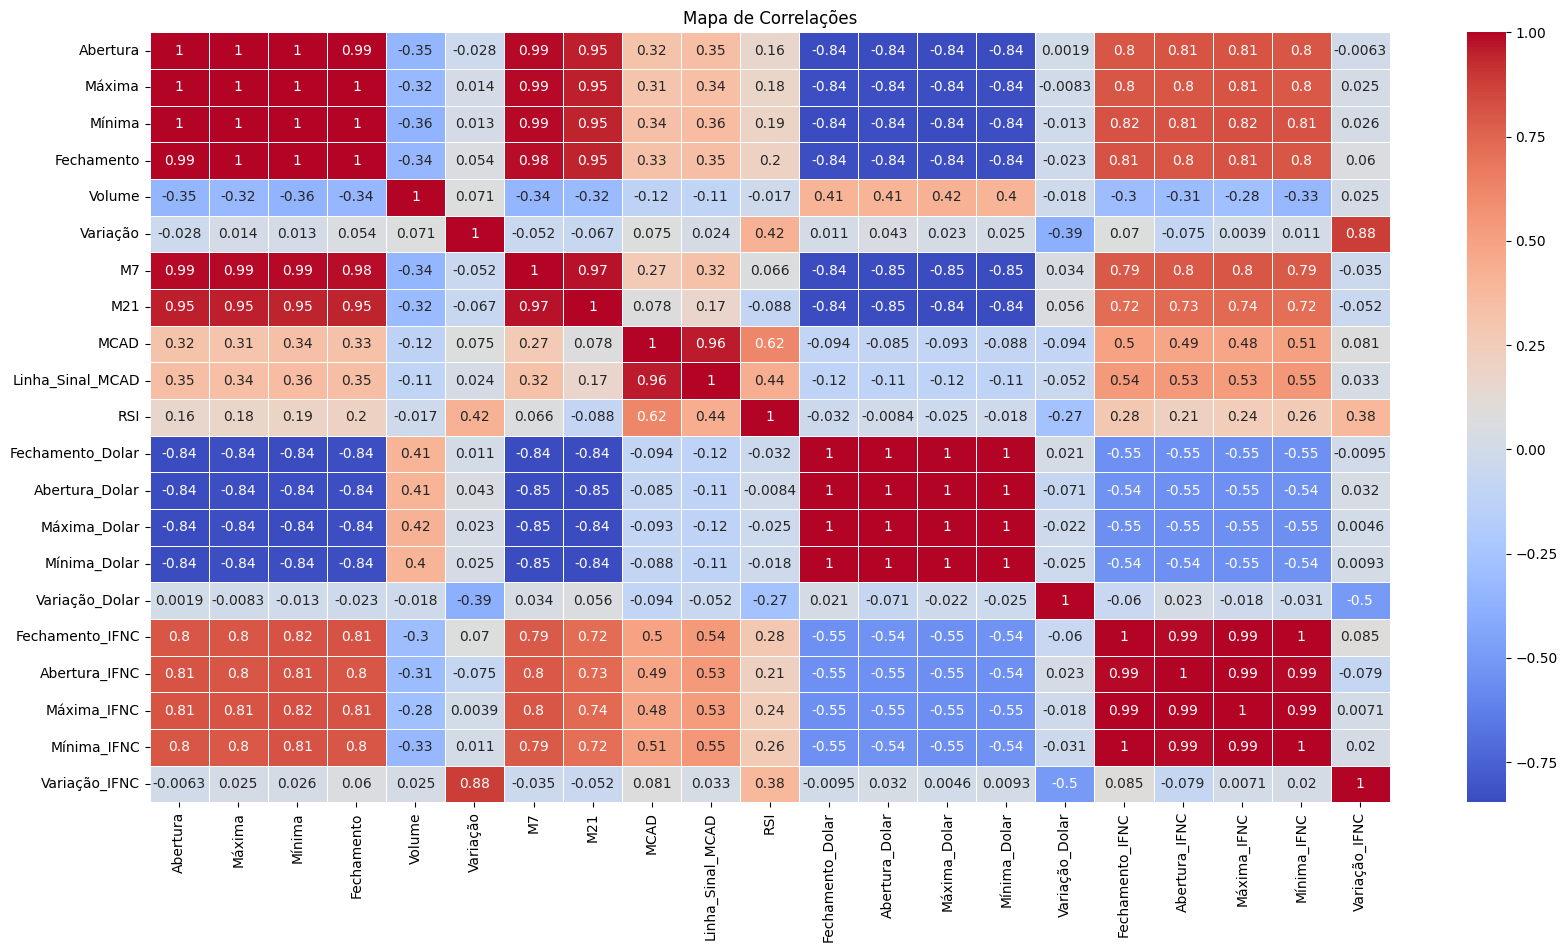

In [51]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlacao_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Correlações')
plt.show()

## Nova análise

<AxesSubplot: >

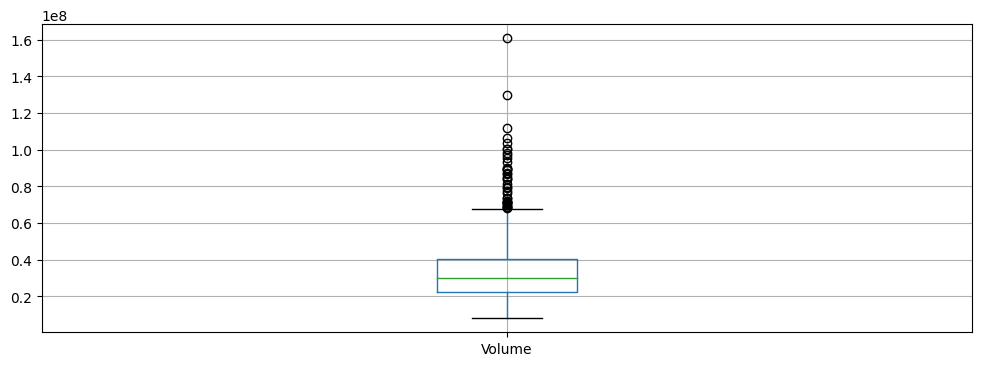

In [52]:
df[['Volume']].boxplot(figsize=(12,4))

<AxesSubplot: >

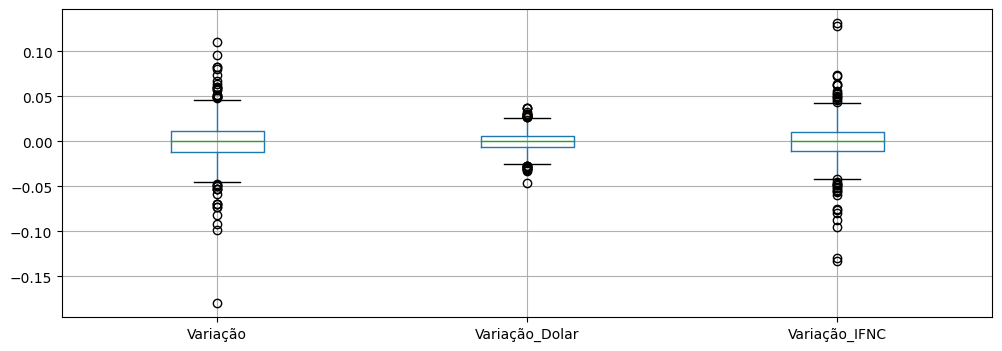

In [53]:
df[['Variação', 'Variação_Dolar', 'Variação_IFNC']].boxplot(figsize=(12,4))

## Dataframe sem volume

In [54]:
df=df.drop(columns=['Volume'])
df.describe()

,Abertura,Máxima,Mínima,Fechamento,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI,Fechamento_Dolar,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,28.465905,28.838944,28.079419,28.446011,0.000126,28.456506,28.484891,-0.034207,-0.036664,50.637474,4.951173,4.950585,4.990068,4.912514,0.000276,11023.681130,11021.748681,11151.526986,10896.106306,0.000356
std,4.326976,4.327261,4.309048,4.323607,0.020910,4.300413,4.263762,0.636232,0.600722,16.374599,0.559752,0.561177,0.569372,0.550988,0.010515,1182.426621,1179.803241,1157.926190,1197.046426,0.019178
min,21.170000,21.309999,20.000000,20.520000,-0.179643,21.287143,21.700000,-2.952659,-2.521880,11.090633,3.644000,3.645500,3.682200,3.635800,-0.045800,6926.180000,6929.340000,7568.600000,6817.250000,-0.132800
25%,25.070000,25.480000,24.700001,25.049999,-0.011711,25.091428,25.268095,-0.458268,-0.436909,38.226449,4.768900,4.770000,4.808600,4.729700,-0.006400,10200.330000,10201.150000,10343.850000,10037.330000,-0.010100
50%,27.520000,27.850000,27.170000,27.530001,0.000000,27.451428,27.380952,-0.011047,-0.011626,50.230691,5.122200,5.122000,5.170100,5.077600,0.000200,11111.760000,11112.580000,11212.060000,10982.400000,0.000700
75%,31.650000,32.070000,31.270000,31.650000,0.011773,31.692857,31.486667,0.427749,0.389476,62.465235,5.334800,5.334000,5.383600,5.283800,0.006500,11893.440000,11892.770000,12031.620000,11784.350000,0.011000
max,38.669998,39.790001,38.400002,39.689999,0.110593,38.491428,37.828095,1.385179,1.246222,93.807429,5.885600,5.924800,5.971800,5.817600,0.037300,13803.590000,13756.280000,13806.390000,13724.830000,0.131500


In [55]:
copia=df.copy()

In [56]:
#df=copia.copy()
# df

## Decisão

In [57]:
# Função para atribuir valores à coluna 'Decisão'
def decisao(row, df):
    data_atual = row.name
    proximas_7 = df.loc[data_atual + pd.DateOffset(days=1): data_atual + pd.DateOffset(days=7)]

    deve_comprar = any((proximas_7['Máxima'] / row['Fechamento']) > 1.025)
    df.loc[data_atual, 'Decisão'] = 1 if deve_comprar else 0

# Aplicando a função a cada linha do DataFrame, exceto as 7 últimas
for index, row in df.iloc[:-7].iterrows():
    decisao(row, df)

In [58]:
df['Decisão'].tail(10)

Data
2023-12-14    0.0
2023-12-15    0.0
2023-12-18    0.0
2023-12-19    NaN
2023-12-20    NaN
2023-12-21    NaN
2023-12-22    NaN
2023-12-26    NaN
2023-12-27    NaN
2023-12-28    NaN
Name: Decisão, dtype: float64

In [59]:
df=df.dropna()
df

,Abertura,Máxima,Mínima,Fechamento,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI,...,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC,Decisão
Data,,,,,,,,,,,,,,,,,,,,,
2019-01-31,38.459999,39.389999,38.369999,38.779999,0.017314,37.894286,37.594286,0.267369,0.164283,73.507871,...,3.6865,3.6865,3.6358,-0.0111,11521.56,11292.98,11647.44,11292.98,0.0202,1.0
2019-02-01,38.599998,39.099998,38.340000,38.810001,0.000774,38.111429,37.680476,0.324773,0.196381,73.879202,...,3.6455,3.6822,3.6376,0.0043,11554.32,11522.26,11592.67,11426.06,0.0028,1.0
2019-02-04,38.669998,39.790001,38.400002,39.689999,0.022674,38.418571,37.779524,0.436246,0.244354,82.283397,...,3.6597,3.6877,3.6592,0.0025,11757.37,11554.32,11760.17,11410.03,0.0176,0.0
2019-02-05,38.560001,38.799999,37.619999,38.000000,-0.042580,38.491428,37.828095,0.383796,0.272242,48.035914,...,3.6636,3.6846,3.6609,0.0003,11674.70,11757.37,11757.37,11529.95,-0.0070,0.0
2019-02-06,37.799999,37.889999,36.400002,36.400002,-0.042105,38.240000,37.797143,0.210694,0.259932,33.021834,...,3.6696,3.7161,3.6672,0.0077,11181.70,11674.70,11674.70,11181.70,-0.0422,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-12,31.879999,31.940001,31.389999,31.639999,-0.005031,31.705714,31.023333,0.804909,0.853513,61.804545,...,4.9335,4.9740,4.9220,0.0050,12899.16,13000.76,13053.23,12878.34,-0.0078,1.0
2023-12-13,31.639999,32.770000,31.639999,32.599998,0.030341,31.857143,31.176191,0.840012,0.850813,77.084710,...,4.9663,4.9773,4.9145,-0.0087,13284.85,12898.99,13336.85,12859.85,0.0299,0.0
2023-12-14,32.740002,33.040001,32.410000,32.869999,0.008282,32.010000,31.320952,0.879481,0.856547,79.717840,...,4.8755,4.9180,4.8749,-0.0009,13481.30,13284.83,13544.79,13284.83,0.0148,0.0


In [60]:
df['Decisão'] = df['Decisão'].astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2019-01-31 to 2023-12-18
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Abertura          1214 non-null   float64
 1   Máxima            1214 non-null   float64
 2   Mínima            1214 non-null   float64
 3   Fechamento        1214 non-null   float64
 4   Variação          1214 non-null   float64
 5   M7                1214 non-null   float64
 6   M21               1214 non-null   float64
 7   MCAD              1214 non-null   float64
 8   Linha_Sinal_MCAD  1214 non-null   float64
 9   RSI               1214 non-null   float64
 10  Fechamento_Dolar  1214 non-null   float64
 11  Abertura_Dolar    1214 non-null   float64
 12  Máxima_Dolar      1214 non-null   float64
 13  Mínima_Dolar      1214 non-null   float64
 14  Variação_Dolar    1214 non-null   float64
 15  Fechamento_IFNC   1214 non-null   float64
 16  Abertura_IFNC     1214 n

In [62]:
proporcao_compra = (df[df['Decisão'] == 1]['Decisão'].count())/(df['Decisão'].count())
proporcao_compra

0.5238879736408567

## Análise adicional

### Correlações

In [63]:
df.corr()

,Abertura,Máxima,Mínima,Fechamento,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI,...,Abertura_Dolar,Máxima_Dolar,Mínima_Dolar,Variação_Dolar,Fechamento_IFNC,Abertura_IFNC,Máxima_IFNC,Mínima_IFNC,Variação_IFNC,Decisão
Abertura,1.000000,0.997140,0.997212,0.994171,-0.029226,0.988778,0.951900,0.313138,0.340985,0.152017,...,-0.841472,-0.843952,-0.842891,0.002768,0.804885,0.807024,0.811731,0.802825,-0.006979,-0.159809
Máxima,0.997140,1.000000,0.996788,0.997452,0.012676,0.987869,0.952767,0.305219,0.331723,0.169339,...,-0.837217,-0.839735,-0.839370,-0.007397,0.802435,0.799169,0.808575,0.796375,0.024280,-0.160770
Mínima,0.997212,0.996788,1.000000,0.997499,0.011253,0.986186,0.945792,0.329512,0.353355,0.178087,...,-0.838841,-0.842567,-0.840518,-0.012136,0.817368,0.813781,0.820027,0.814334,0.025611,-0.164543
Fechamento,0.994171,0.997452,0.997499,1.000000,0.052754,0.984823,0.946616,0.320275,0.343220,0.194869,...,-0.837205,-0.840707,-0.839504,-0.022407,0.813086,0.803669,0.813741,0.804818,0.059138,-0.169142
Variação,-0.029226,0.012676,0.011253,0.052754,1.000000,-0.053594,-0.068320,0.073606,0.022756,0.419906,...,0.043049,0.023107,0.025051,-0.387419,0.067890,-0.078413,0.001132,0.008367,0.877686,-0.108721
M7,0.988778,0.987869,0.986186,0.984823,-0.053594,1.000000,0.974830,0.264767,0.318378,0.057126,...,-0.847766,-0.847870,-0.847750,0.034799,0.788879,0.795788,0.798951,0.785737,-0.035285,-0.154705
M21,0.951900,0.952767,0.945792,0.946616,-0.068320,0.974830,1.000000,0.071470,0.159975,-0.096506,...,-0.846495,-0.844571,-0.845968,0.056521,0.724423,0.734521,0.739376,0.719018,-0.052768,-0.142681
MCAD,0.313138,0.305219,0.329512,0.320275,0.073606,0.264767,0.071470,1.000000,0.958001,0.616588,...,-0.084635,-0.092077,-0.086957,-0.093885,0.491864,0.477067,0.472171,0.499720,0.080509,-0.095302
Linha_Sinal_MCAD,0.340985,0.331723,0.353355,0.343220,0.022756,0.318378,0.159975,0.958001,1.000000,0.431659,...,-0.110343,-0.114297,-0.111232,-0.051063,0.529622,0.523403,0.517565,0.537879,0.031896,-0.099539
RSI,0.152017,0.169339,0.178087,0.194869,0.419906,0.057126,-0.096506,0.616588,0.431659,1.000000,...,-0.007021,-0.023261,-0.016828,-0.268802,0.268055,0.199843,0.229029,0.244680,0.385577,-0.089346


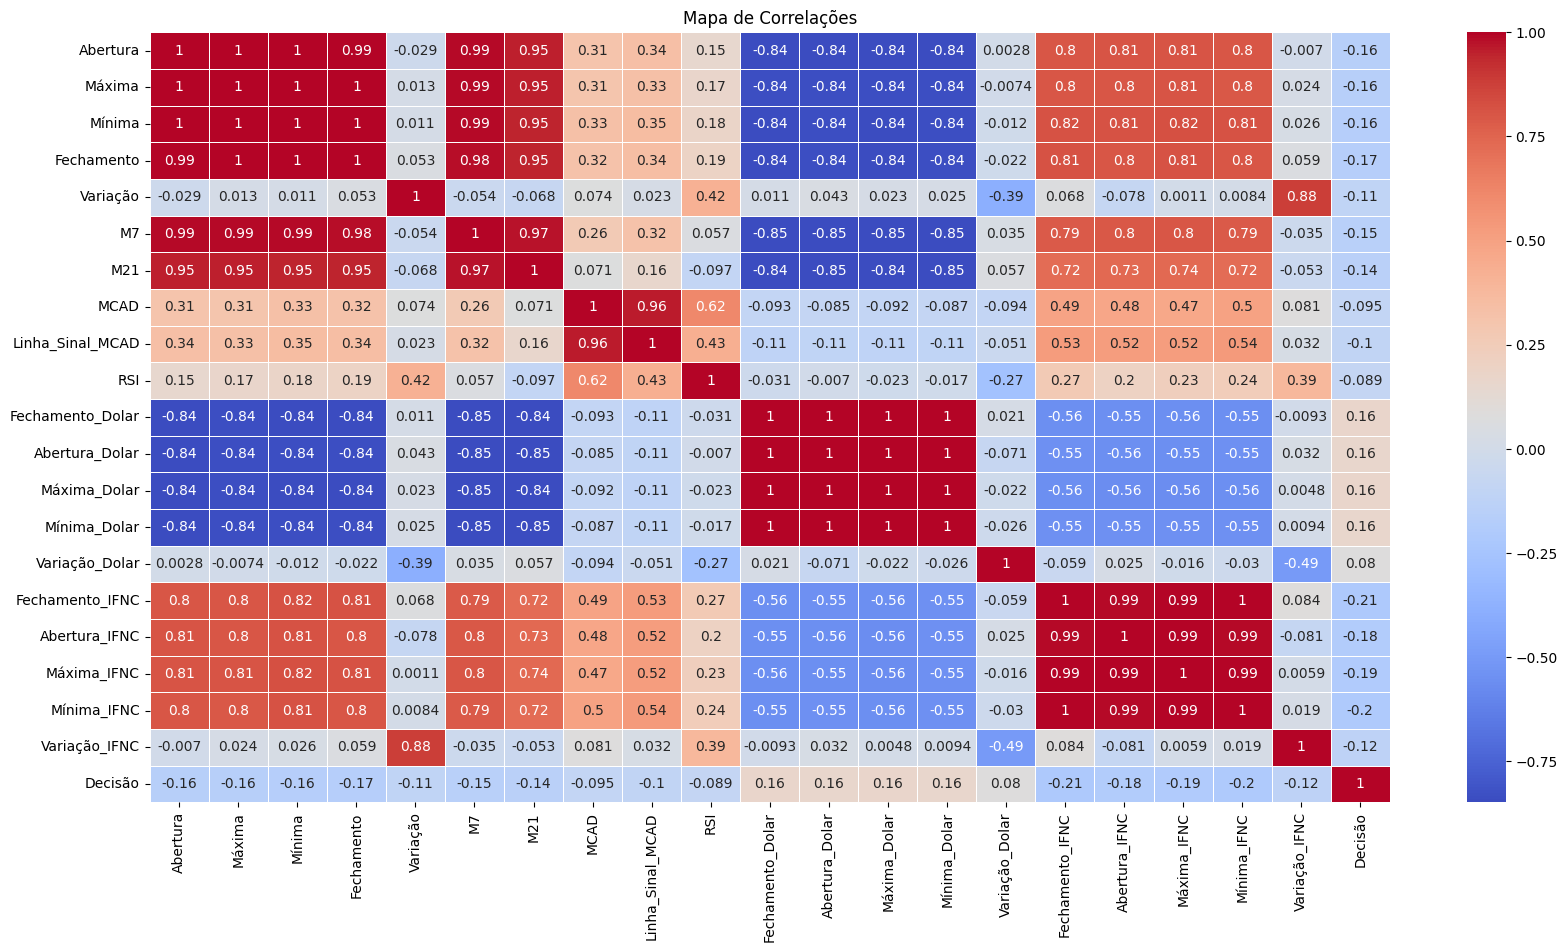

In [64]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Correlações')
plt.show()

### Histogramas

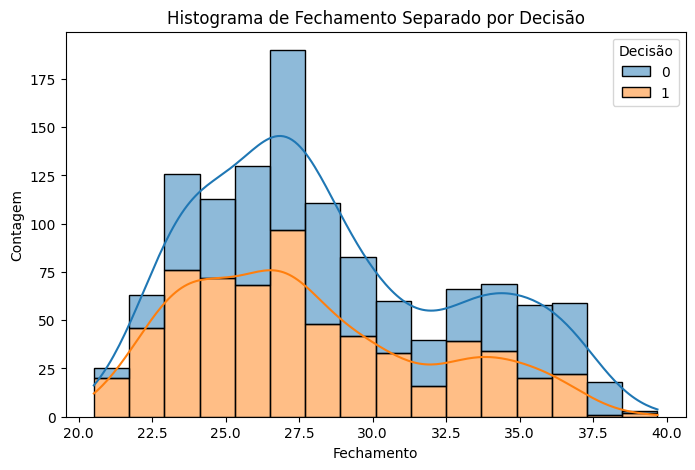

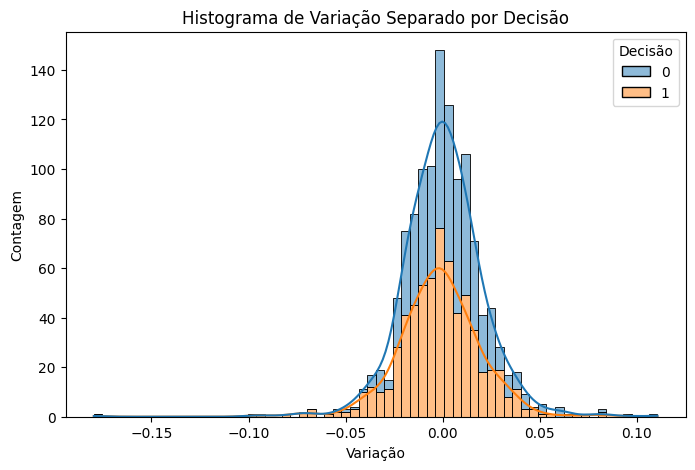

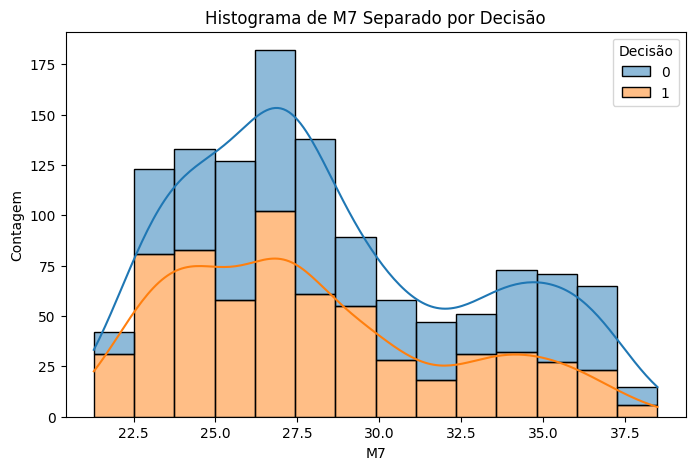

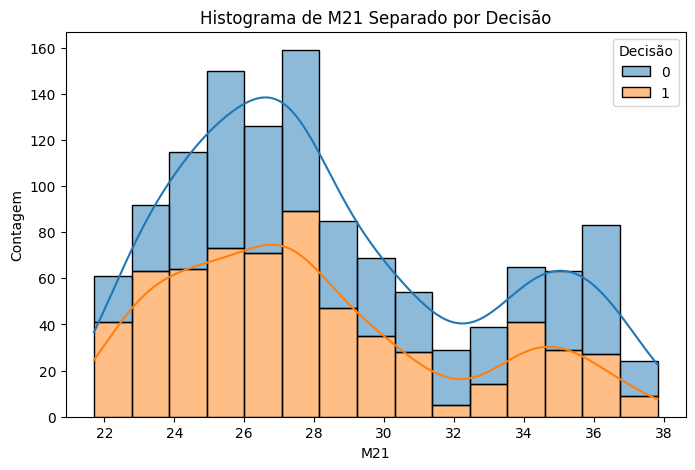

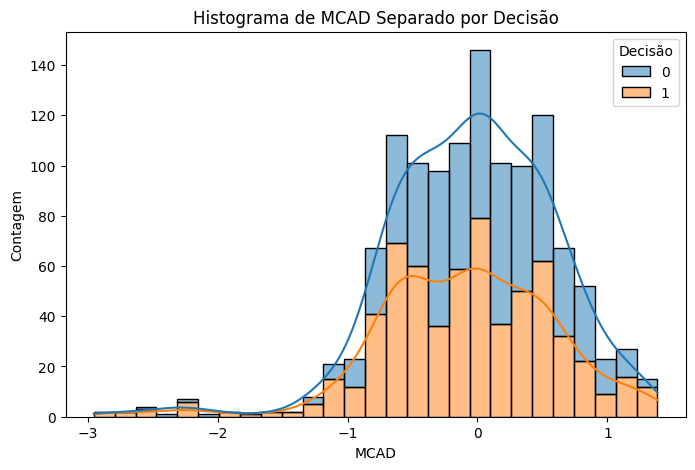

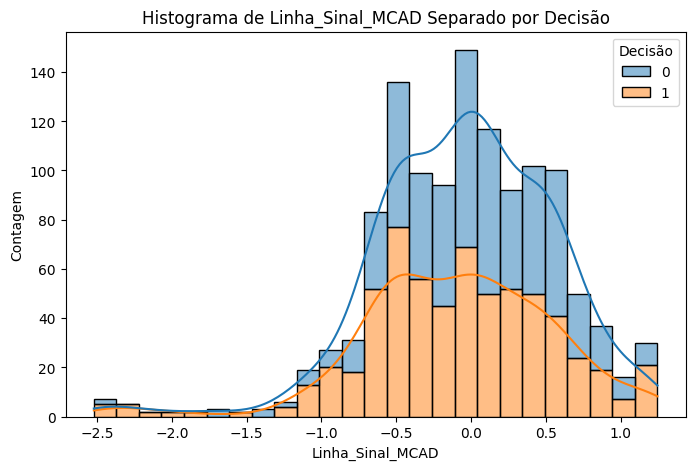

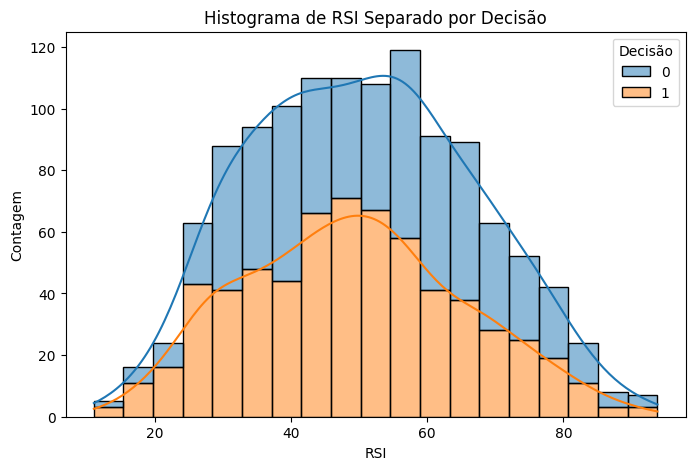

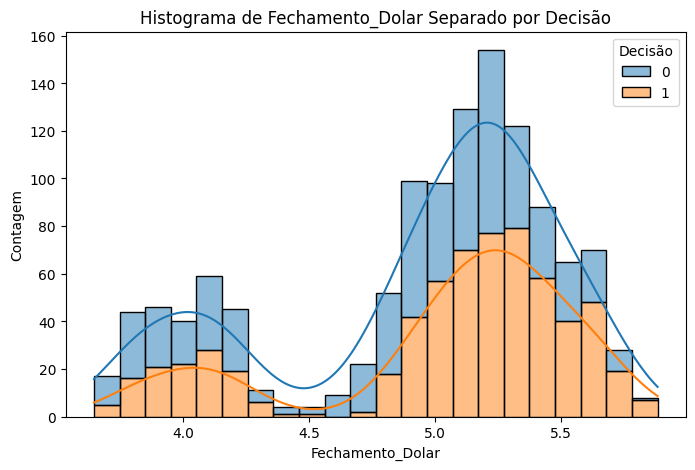

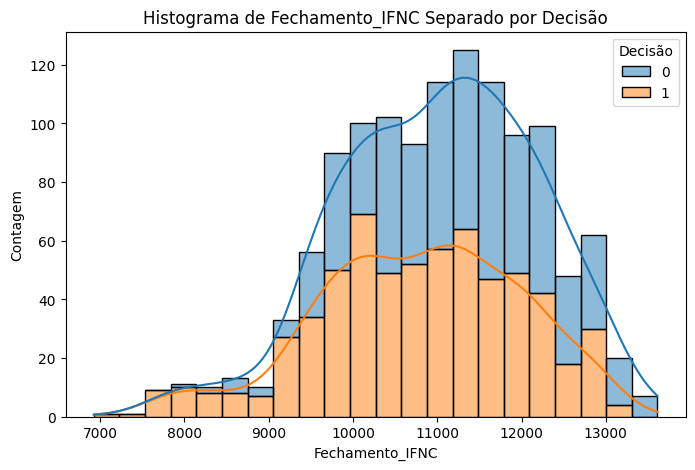

In [65]:
variaveis = ['Fechamento', 'Variação', 'M7', 'M21','MCAD', 
            'Linha_Sinal_MCAD', 'RSI', 'Fechamento_Dolar', 'Fechamento_IFNC']

for variavel in variaveis:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=variavel, hue='Decisão', multiple='stack', kde=True)
    plt.title(f'Histograma de {variavel} Separado por Decisão')
    plt.xlabel(variavel)
    plt.ylabel('Contagem')
    plt.show()


## Retirando a última linha de df:

In [66]:
ultima_linha = df.tail(1)

In [67]:

ultima_linha['Decisão']

Data
2023-12-18    0
Name: Decisão, dtype: int32

In [68]:
df = df.iloc[:-1]

## Dataframe final

In [69]:
copia_2=df.copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1213 entries, 2019-01-31 to 2023-12-15
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Abertura          1213 non-null   float64
 1   Máxima            1213 non-null   float64
 2   Mínima            1213 non-null   float64
 3   Fechamento        1213 non-null   float64
 4   Variação          1213 non-null   float64
 5   M7                1213 non-null   float64
 6   M21               1213 non-null   float64
 7   MCAD              1213 non-null   float64
 8   Linha_Sinal_MCAD  1213 non-null   float64
 9   RSI               1213 non-null   float64
 10  Fechamento_Dolar  1213 non-null   float64
 11  Abertura_Dolar    1213 non-null   float64
 12  Máxima_Dolar      1213 non-null   float64
 13  Mínima_Dolar      1213 non-null   float64
 14  Variação_Dolar    1213 non-null   float64
 15  Fechamento_IFNC   1213 non-null   float64
 16  Abertura_IFNC     1213 n

# Machine Learning - Classificação

### Bibliotecas

In [71]:
## Método para a divisão dos dados entre treino e teste
from sklearn.model_selection import train_test_split

## Método para a otimização de parâmetros de um modelo
from sklearn.model_selection import GridSearchCV

## Validação cruzada que divide um conjunto de dados em k dobras
from sklearn.model_selection import KFold

## Métodos de padronização/normalização
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Métodos para relatórios dos resultados dos modelos aplicados
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix, make_scorer
# Modelo SVM
from sklearn.svm import SVC 

# Modelo Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier 

## LGBM
!pip install lightgbm
from lightgbm import LGBMClassifier


Defaulting to user installation because normal site-packages is not writeable


### Definição das funções

In [72]:
## Separa o dataframe em X(caracteristicas a serem avaliadas) e  y(caracteristica que desejamos prever)
def separa_dataframe_em_X_y(dataframe: pd.DataFrame, característica: str = 'Decisão'):
  X = dataframe.drop(característica, axis=1)
  y = dataframe[característica]
  return (X, y)

In [73]:
## A função retorna os dataframes de treino e teste para X e y.
def separa_treino_e_teste(X: pd.DataFrame, y: pd.DataFrame):
  return train_test_split(X, y, test_size=0.2, random_state=123)

In [74]:
## Função gera_relatorio apresenta um relatório sobre a execução do modelo e a matriz de confusão
def gera_relatorio(y_test: np.array, y_pred: np.array,  modelo: str):
    print('='*30)
    print(f'{modelo}')
    print('='*30)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, previsoes))
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, previsoes), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

In [75]:
def normaliza_dataframe(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

## Modelos dataframe original

### SVM

In [80]:
X, y = separa_dataframe_em_X_y(df)

In [81]:
X = normaliza_dataframe(X)

In [82]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

In [83]:
modelo_svm = SVC(random_state=123)

In [84]:
modelo_svm.fit(X_train, y_train)

SVC(random_state=123)

In [85]:
# Fazer previsões no conjunto de teste
previsoes = modelo_svm.predict(X_test)

SVM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61       103
           1       0.72      0.57      0.64       140

    accuracy                           0.63       243
   macro avg       0.63      0.64      0.63       243
weighted avg       0.65      0.63      0.63       243



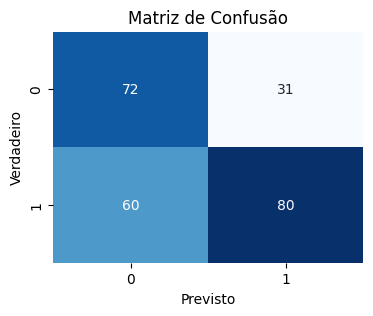

In [86]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes,'SVM')

#### Teste de kernel

##### Linear

In [87]:
svm_linear = SVC(kernel='linear', random_state=123)

In [88]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [89]:
# Fazer previsões no conjunto de teste
previsoes = svm_linear.predict(X_test)

svm_linear

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       103
           1       0.68      0.59      0.63       140

    accuracy                           0.60       243
   macro avg       0.60      0.60      0.60       243
weighted avg       0.61      0.60      0.60       243



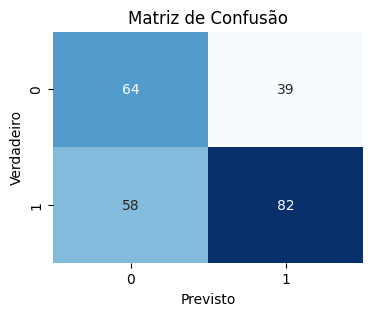

In [90]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_linear')

##### Poly

In [91]:
svm_poly = SVC(kernel='poly', degree=3, random_state=123)

In [92]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=123)

In [93]:
# Fazer previsões no conjunto de teste
previsoes = svm_poly.predict(X_test)

svm_poly

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.59      0.41      0.48       103
           1       0.65      0.79      0.71       140

    accuracy                           0.63       243
   macro avg       0.62      0.60      0.60       243
weighted avg       0.62      0.63      0.61       243



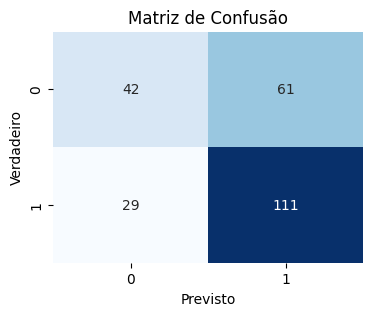

In [94]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_poly')

##### sigmoid

In [95]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=123)

In [96]:
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=123)

In [97]:
# Fazer previsões no conjunto de teste
previsoes = svm_sigmoid.predict(X_test)

svm_sigmoid

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.43      0.56      0.49       103
           1       0.58      0.45      0.51       140

    accuracy                           0.50       243
   macro avg       0.51      0.51      0.50       243
weighted avg       0.52      0.50      0.50       243



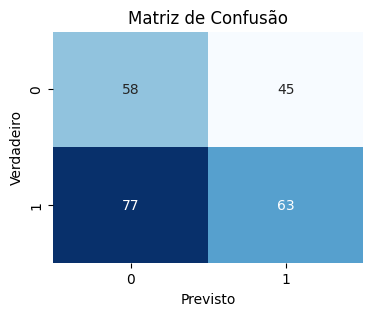

In [98]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_sigmoid')

### Light Gradient Boosting Machine (LGBM)

In [100]:
X, y = separa_dataframe_em_X_y(df)

In [101]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo LightGBM
LGBM = LGBMClassifier(random_state=123)


In [102]:
# Treinar o modelo
LGBM.fit(X_train, y_train)

# Fazer previsões
previsoes = LGBM.predict(X_test)

[LightGBM] [Info] Number of positive: 496, number of negative: 474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511340 -> initscore=0.045369
[LightGBM] [Info] Start training from score 0.045369


LGBM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       103
           1       0.78      0.70      0.74       140

    accuracy                           0.72       243
   macro avg       0.71      0.72      0.71       243
weighted avg       0.72      0.72      0.72       243



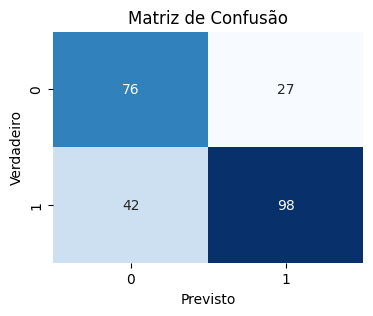

In [103]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'LGBM')

#### Importância das variáveis

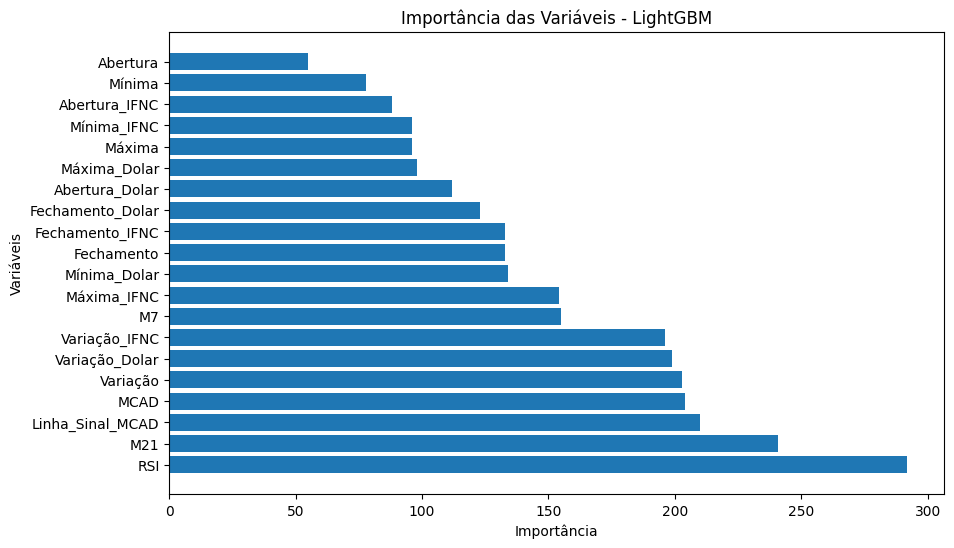

In [105]:
importancia_variaveis = LGBM.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - LightGBM')
plt.show()

### Random Forest

In [106]:
X, y = separa_dataframe_em_X_y(df)

In [107]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo de Floresta Aleatória
RF = RandomForestClassifier(random_state=123)


In [108]:
# Treinar o modelo
RF.fit(X_train, y_train)

# Fazer previsões
previsoes = RF.predict(X_test)

RF

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       103
           1       0.81      0.75      0.78       140

    accuracy                           0.76       243
   macro avg       0.75      0.76      0.75       243
weighted avg       0.76      0.76      0.76       243



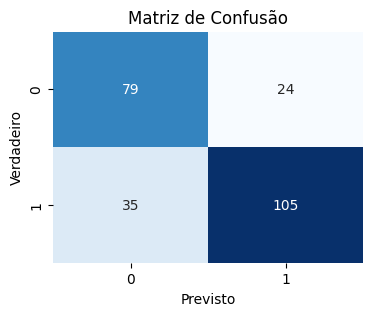

In [109]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'RF')

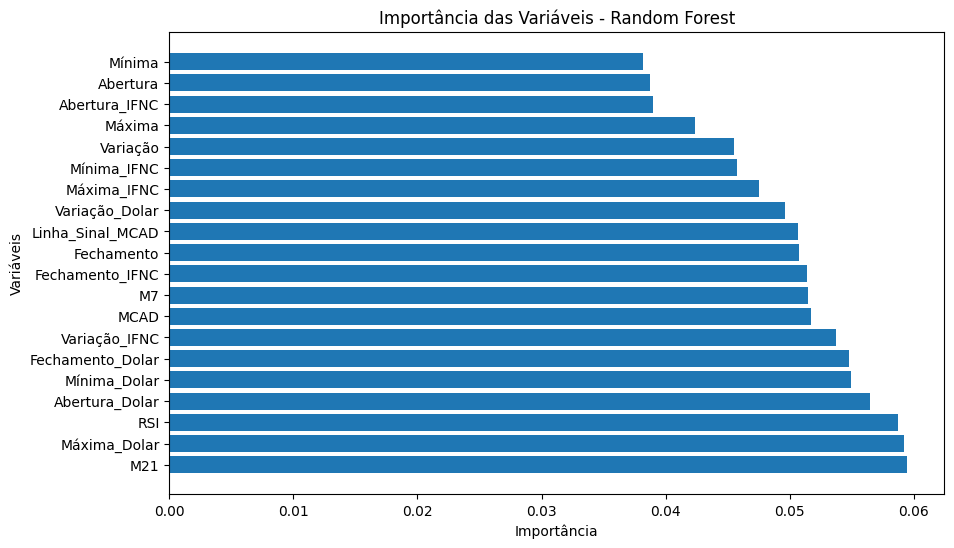

In [110]:
importancia_variaveis = RF.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

## Modelos com menos variáveis do Dólar e IFNC

### dataframe

In [111]:
df_novo=df.copy()

In [112]:
df_novo=df.drop(columns=['Abertura_Dolar', 'Máxima_Dolar', 'Mínima_Dolar','Abertura_IFNC','Máxima_IFNC', 'Mínima_IFNC'])

In [113]:
df_novo

,Abertura,Máxima,Mínima,Fechamento,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI,Fechamento_Dolar,Variação_Dolar,Fechamento_IFNC,Variação_IFNC,Decisão
Data,,,,,,,,,,,,,,,
2019-01-31,38.459999,39.389999,38.369999,38.779999,0.017314,37.894286,37.594286,0.267369,0.164283,73.507871,3.6440,-0.0111,11521.56,0.0202,1
2019-02-01,38.599998,39.099998,38.340000,38.810001,0.000774,38.111429,37.680476,0.324773,0.196381,73.879202,3.6597,0.0043,11554.32,0.0028,1
2019-02-04,38.669998,39.790001,38.400002,39.689999,0.022674,38.418571,37.779524,0.436246,0.244354,82.283397,3.6687,0.0025,11757.37,0.0176,0
2019-02-05,38.560001,38.799999,37.619999,38.000000,-0.042580,38.491428,37.828095,0.383796,0.272242,48.035914,3.6699,0.0003,11674.70,-0.0070,0
2019-02-06,37.799999,37.889999,36.400002,36.400002,-0.042105,38.240000,37.797143,0.210694,0.259932,33.021834,3.6983,0.0077,11181.70,-0.0422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,31.850000,32.070000,31.730000,31.799999,-0.006871,31.685714,30.925714,0.846141,0.865665,68.391852,4.9386,0.0014,13000.70,0.0008,1
2023-12-12,31.879999,31.940001,31.389999,31.639999,-0.005031,31.705714,31.023333,0.804909,0.853513,61.804545,4.9631,0.0050,12899.16,-0.0078,1
2023-12-13,31.639999,32.770000,31.639999,32.599998,0.030341,31.857143,31.176191,0.840012,0.850813,77.084710,4.9197,-0.0087,13284.85,0.0299,0


### SVM

In [114]:
X, y = separa_dataframe_em_X_y(df_novo)

In [115]:
X = normaliza_dataframe(X)

In [116]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

In [117]:
modelo_svm = SVC(random_state=123)

In [118]:
modelo_svm.fit(X_train, y_train)

SVC(random_state=123)

In [119]:
# Fazer previsões no conjunto de teste
previsoes = modelo_svm.predict(X_test)

SVM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       103
           1       0.72      0.56      0.63       140

    accuracy                           0.62       243
   macro avg       0.63      0.63      0.62       243
weighted avg       0.64      0.62      0.62       243



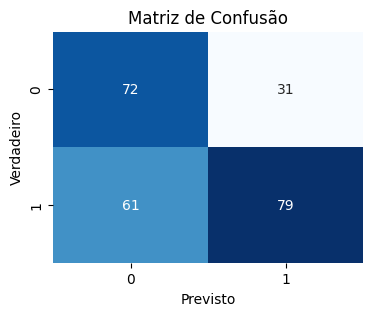

In [120]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'SVM')

### Light Gradient Boosting Machine (LGBM)

In [121]:
X, y = separa_dataframe_em_X_y(df_novo)

In [122]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo LightGBM 
# verbose=-1 omite detalhes do processo
modelo_lgbm = LGBMClassifier(random_state=123, verbose=-1) 

In [123]:
# Treinar o modelo
modelo_lgbm.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo_lgbm.predict(X_test)

modelo_lgbm

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       103
           1       0.78      0.73      0.76       140

    accuracy                           0.73       243
   macro avg       0.72      0.73      0.73       243
weighted avg       0.73      0.73      0.73       243



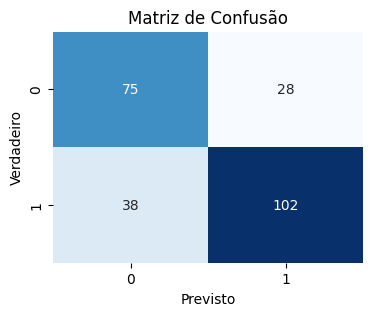

In [124]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'modelo_lgbm')

#### Importância das variáveis

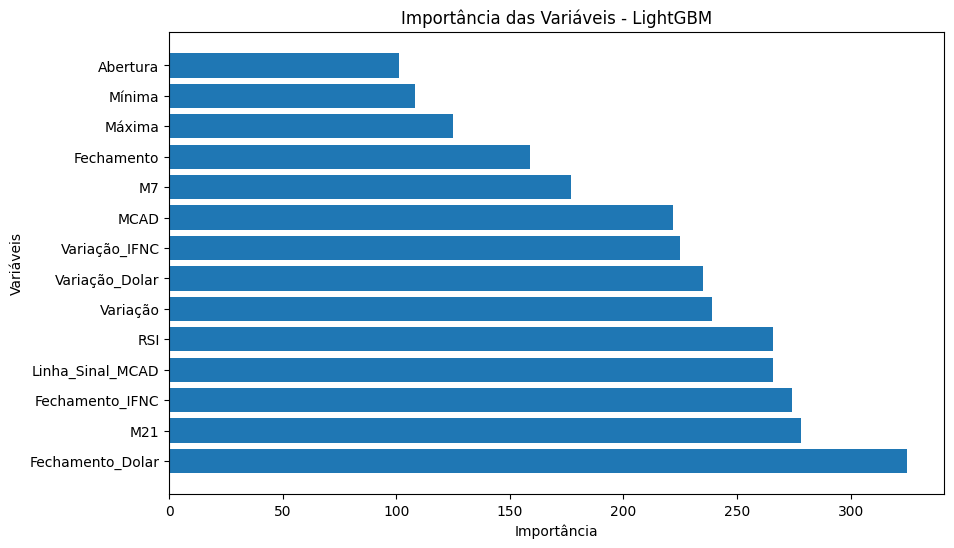

In [126]:
importancia_variaveis = modelo_lgbm.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - LightGBM')
plt.show()

### Random Forest

In [127]:
X, y = separa_dataframe_em_X_y(df_novo, 'Decisão')

In [128]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo de Floresta Aleatória
modelo_rf = RandomForestClassifier(random_state=123)


In [129]:
# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo_rf.predict(X_test)

modelo_rf

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       103
           1       0.77      0.72      0.74       140

    accuracy                           0.71       243
   macro avg       0.71      0.71      0.71       243
weighted avg       0.72      0.71      0.71       243



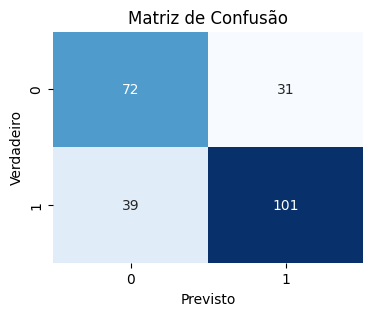

In [130]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'modelo_rf')

#### Importância das variáveis

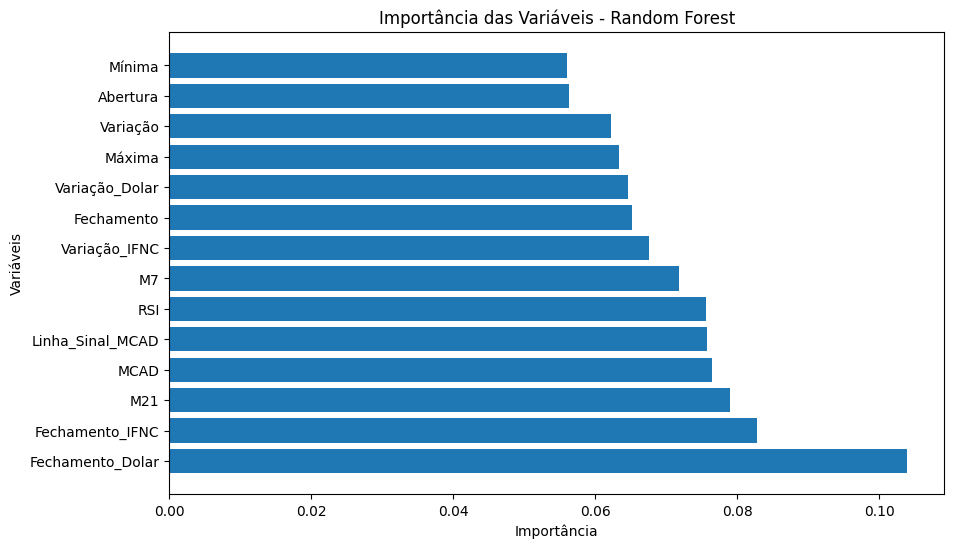

In [131]:
importancia_variaveis = modelo_rf.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

## Modelos sem variação do dólar e do IFNC

In [132]:
df_novo=df.copy()

In [133]:
df_novo=df.drop(columns=[ 'Variação_Dolar', 'Variação_IFNC']) 

### SVM

In [134]:
X, y = separa_dataframe_em_X_y(df_novo)

In [135]:
X = normaliza_dataframe(X)

In [136]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

In [137]:
modelo_svm = SVC(random_state=123)

In [138]:
modelo_svm.fit(X_train, y_train)

SVC(random_state=123)

In [139]:
# Fazer previsões no conjunto de teste
previsoes = modelo_svm.predict(X_test)

SVM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       103
           1       0.73      0.59      0.65       140

    accuracy                           0.64       243
   macro avg       0.64      0.65      0.64       243
weighted avg       0.66      0.64      0.64       243



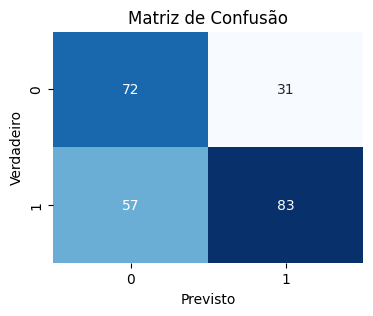

In [140]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'SVM')

### Light Gradient Boosting Machine (LGBM)

In [141]:
X, y = separa_dataframe_em_X_y(df_novo)

In [142]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo LightGBM
LGBM = LGBMClassifier(random_state=123)

In [143]:
# Treinar o modelo
LGBM.fit(X_train, y_train)

# Fazer previsões
previsoes = LGBM.predict(X_test)

[LightGBM] [Info] Number of positive: 496, number of negative: 474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511340 -> initscore=0.045369
[LightGBM] [Info] Start training from score 0.045369


LGBM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       103
           1       0.81      0.72      0.76       140

    accuracy                           0.74       243
   macro avg       0.74      0.74      0.74       243
weighted avg       0.75      0.74      0.74       243



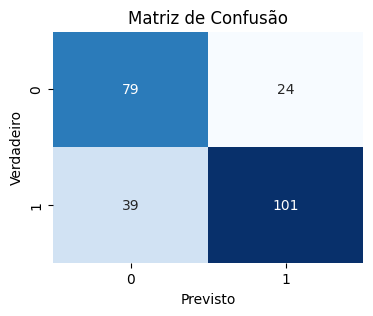

In [144]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'LGBM')

#### Importância das variáveis

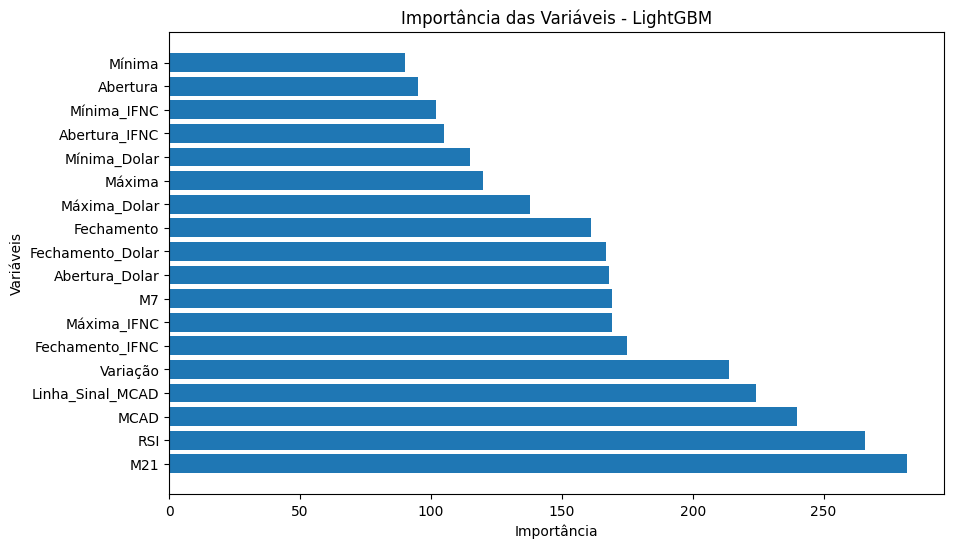

In [145]:
importancia_variaveis = LGBM.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - LightGBM')
plt.show()

### Random Forest

In [146]:
X, y = separa_dataframe_em_X_y(df_novo)

In [147]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo de Floresta Aleatória
RF = RandomForestClassifier(random_state=123)

In [148]:
# Treinar o modelo
RF.fit(X_train, y_train)

# Fazer previsões
previsoes = RF.predict(X_test)

RF

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       103
           1       0.80      0.76      0.78       140

    accuracy                           0.76       243
   macro avg       0.75      0.76      0.75       243
weighted avg       0.76      0.76      0.76       243



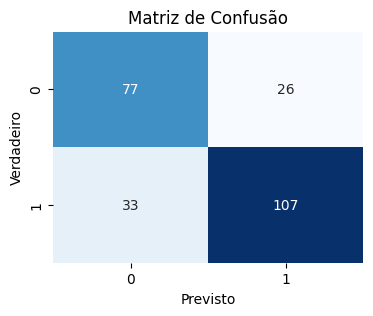

In [149]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'RF')

#### Importância das variáveis

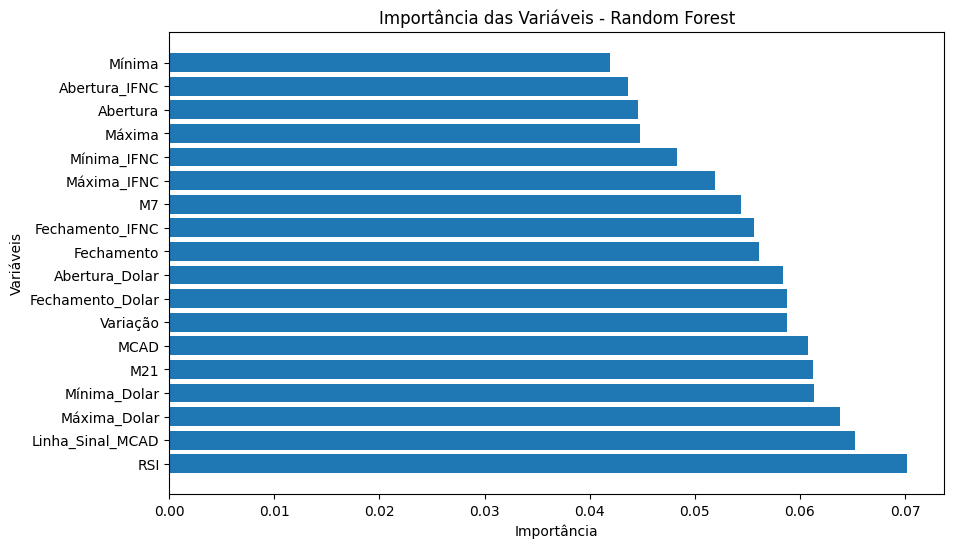

In [150]:
importancia_variaveis = RF.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

## Dataframe Simplificado

In [151]:
df_novo=df.copy()

In [152]:
df_novo=df.drop(columns=['Variação_Dolar', 'Variação_IFNC','Abertura_Dolar', 'Máxima_Dolar', 'Mínima_Dolar','Abertura_IFNC','Máxima_IFNC', 'Mínima_IFNC'])

In [153]:
df_novo

,Abertura,Máxima,Mínima,Fechamento,Variação,M7,M21,MCAD,Linha_Sinal_MCAD,RSI,Fechamento_Dolar,Fechamento_IFNC,Decisão
Data,,,,,,,,,,,,,
2019-01-31,38.459999,39.389999,38.369999,38.779999,0.017314,37.894286,37.594286,0.267369,0.164283,73.507871,3.6440,11521.56,1
2019-02-01,38.599998,39.099998,38.340000,38.810001,0.000774,38.111429,37.680476,0.324773,0.196381,73.879202,3.6597,11554.32,1
2019-02-04,38.669998,39.790001,38.400002,39.689999,0.022674,38.418571,37.779524,0.436246,0.244354,82.283397,3.6687,11757.37,0
2019-02-05,38.560001,38.799999,37.619999,38.000000,-0.042580,38.491428,37.828095,0.383796,0.272242,48.035914,3.6699,11674.70,0
2019-02-06,37.799999,37.889999,36.400002,36.400002,-0.042105,38.240000,37.797143,0.210694,0.259932,33.021834,3.6983,11181.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,31.850000,32.070000,31.730000,31.799999,-0.006871,31.685714,30.925714,0.846141,0.865665,68.391852,4.9386,13000.70,1
2023-12-12,31.879999,31.940001,31.389999,31.639999,-0.005031,31.705714,31.023333,0.804909,0.853513,61.804545,4.9631,12899.16,1
2023-12-13,31.639999,32.770000,31.639999,32.599998,0.030341,31.857143,31.176191,0.840012,0.850813,77.084710,4.9197,13284.85,0


### SVM

In [154]:
X, y = separa_dataframe_em_X_y(df_novo)

In [155]:
X = normaliza_dataframe(X)

In [156]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

In [157]:
modelo_svm = SVC(random_state=123)

In [158]:
modelo_svm.fit(X_train, y_train)

SVC(random_state=123)

In [159]:
# Fazer previsões no conjunto de teste
previsoes = modelo_svm.predict(X_test)

SVM

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62       103
           1       0.73      0.59      0.65       140

    accuracy                           0.64       243
   macro avg       0.64      0.65      0.64       243
weighted avg       0.66      0.64      0.64       243



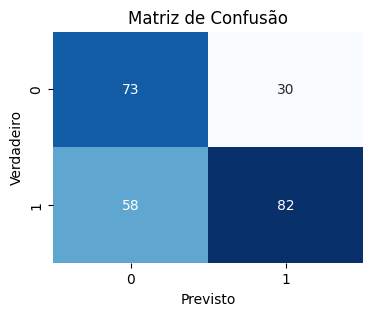

In [160]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'SVM')

#### Teste kernel

##### Linear

In [161]:
svm_linear = SVC(kernel='linear', random_state=123)

In [162]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [163]:
# Fazer previsões no conjunto de teste
previsoes = svm_linear.predict(X_test)

svm_linear

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       103
           1       0.68      0.60      0.64       140

    accuracy                           0.60       243
   macro avg       0.60      0.61      0.60       243
weighted avg       0.61      0.60      0.61       243



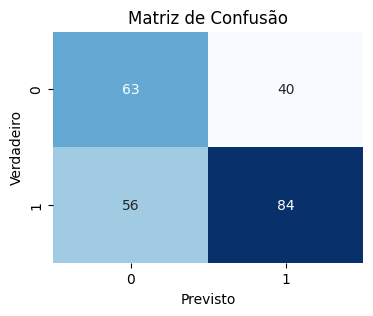

In [164]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_linear')

##### Poly

In [165]:
svm_poly = SVC(kernel='poly', degree=3, random_state=123)

In [166]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=123)

In [167]:
# Fazer previsões no conjunto de teste
previsoes = svm_poly.predict(X_test)

svm_poly

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       103
           1       0.65      0.76      0.70       140

    accuracy                           0.63       243
   macro avg       0.61      0.60      0.60       243
weighted avg       0.62      0.63      0.61       243



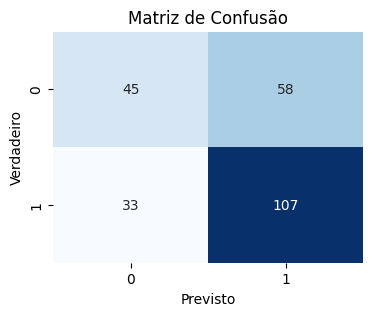

In [168]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_poly')

##### sigmoid

In [169]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=123)

In [170]:
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=123)

In [171]:
# Fazer previsões no conjunto de teste
previsoes = svm_sigmoid.predict(X_test)

svm_sigmoid

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.43      0.56      0.49       103
           1       0.58      0.44      0.50       140

    accuracy                           0.49       243
   macro avg       0.50      0.50      0.49       243
weighted avg       0.51      0.49      0.49       243



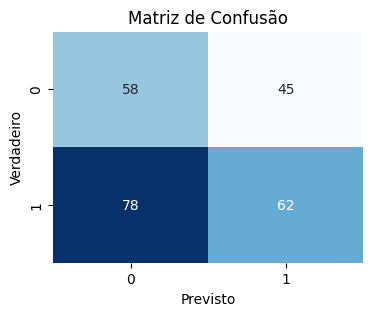

In [172]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'svm_sigmoid')

### Light Gradient Boosting Machine (LGBM)

In [173]:
X, y = separa_dataframe_em_X_y(df_novo)

In [174]:
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo LightGBM 
# verbose=-1 omite detalhes do processo
modelo_lgbm = LGBMClassifier(random_state=123, verbose=-1) 

In [175]:
# Treinar o modelo
modelo_lgbm.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo_lgbm.predict(X_test)

modelo_lgbm

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       103
           1       0.80      0.76      0.78       140

    accuracy                           0.75       243
   macro avg       0.75      0.75      0.75       243
weighted avg       0.76      0.75      0.75       243



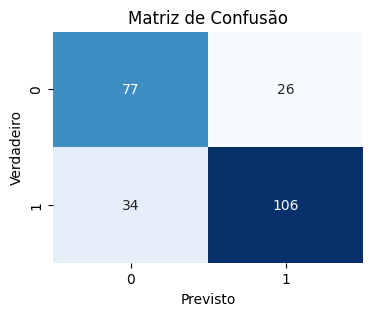

In [176]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'modelo_lgbm')

#### Importância das variáveis

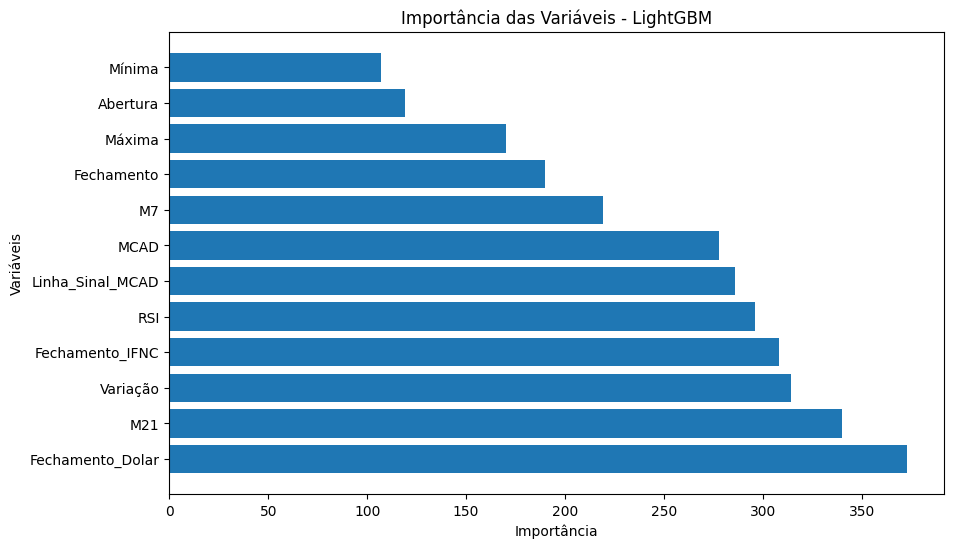

In [177]:
importancia_variaveis = modelo_lgbm.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - LightGBM')
plt.show()

#### Validação cruzada - LGBM escolhido

In [190]:
# Dividir os dados
kf = KFold(n_splits= 5, shuffle=True, random_state=123)

# Listas para armazenar as métricas de cada camada
valores_acuracia = []
valores_precisao = []
valores_recall = []
valores_f1 = []

# Para cada camada:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modelo_lgbm.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    previsoes = modelo_lgbm.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, previsoes)
    precision = precision_score(y_test, previsoes)
    recall = recall_score(y_test, previsoes)
    f1 = f1_score(y_test, previsoes)

    # Armazenar as métricas
    valores_acuracia.append(accuracy)
    valores_precisao.append(precision)
    valores_recall.append(recall)
    valores_f1.append(f1)


# Imprimir as médias das métricas
print("Média da Acurácia:", np.mean(valores_acuracia))
print("Média da Precisão:",  np.mean(valores_precisao))
print("Média do Recall:", np.mean(valores_recall))
print("Média do F1-Score:", np.mean(valores_f1))



Média da Acurácia: 0.7303948576675848
Média da Precisão: 0.7512388466358185
Média do Recall: 0.7318833652564569
Média do F1-Score: 0.7396281768943551


#### Fazendo uma nova previsão após o treinamento do modelo

In [191]:
modelo_lgbm.predict(df_novo.drop(columns=['Decisão']))[-1]

0

#### Busca de melhores hiperparâmetros

In [189]:
# Hiperparâmetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=modelo_lgbm, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Fazer previsões no conjunto de teste com o modelo otimizado
y_pred = grid_search.best_estimator_.predict(X_test)

# Avaliar a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {acuracia:.4f}')

Melhores Hiperparâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Acurácia no conjunto de teste: 0.6488


### Randon Forest

In [179]:
X, y = separa_dataframe_em_X_y(df_novo, 'Decisão')

In [180]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = separa_treino_e_teste(X, y)

# Criar o modelo de Floresta Aleatória
modelo_rf = RandomForestClassifier(random_state=123)


In [181]:
# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo_rf.predict(X_test)

modelo_rf

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       103
           1       0.81      0.78      0.79       140

    accuracy                           0.77       243
   macro avg       0.76      0.76      0.76       243
weighted avg       0.77      0.77      0.77       243



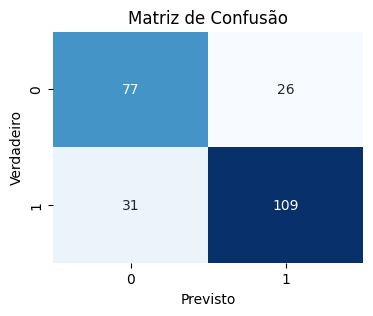

In [182]:
# Avaliar o desempenho do modelo
gera_relatorio(y_test, previsoes, 'modelo_rf')

#### Importância das variáveis

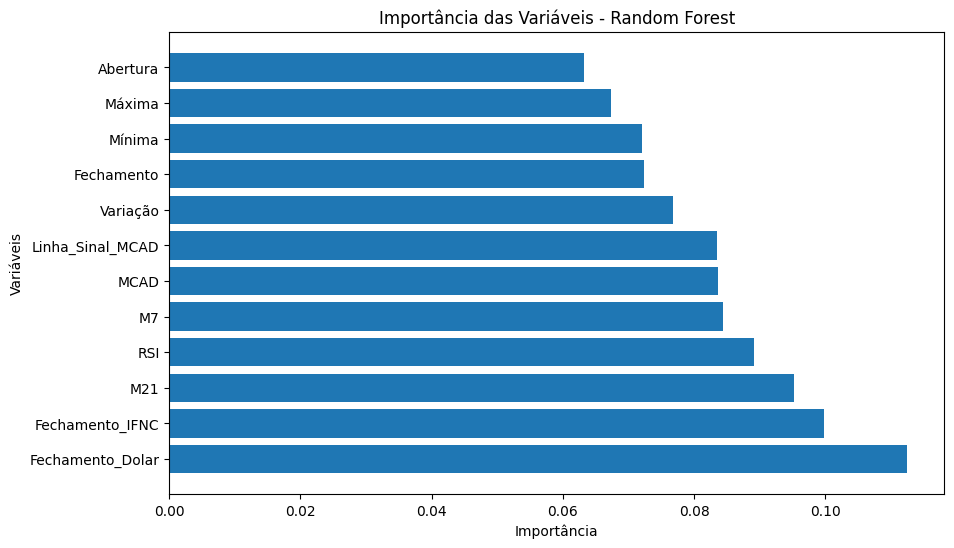

In [183]:
importancia_variaveis = modelo_rf.feature_importances_

# DataFrame com as variáveis e suas importâncias
importancia_variaveis_df = pd.DataFrame({
    'variavel': X_train.columns,  #Colunas sem 'Decisão'
    'importancia': importancia_variaveis
})

# Ordenar o dataFrame
importancia_variaveis_df = importancia_variaveis_df.sort_values(by='importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_variaveis_df['variavel'], importancia_variaveis_df['importancia'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

#### Validação cruzada para o modelo escolhido

In [184]:
# Dividir os dados
kf = KFold(n_splits= 5, shuffle=True, random_state=123)

# Listas para armazenar as métricas de cada camada
valores_acuracia = []
valores_precisao = []
valores_recall = []
valores_f1 = []

# Para cada camada:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modelo_rf.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    previsoes = modelo_rf.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, previsoes)
    precision = precision_score(y_test, previsoes)
    recall = recall_score(y_test, previsoes)
    f1 = f1_score(y_test, previsoes)

    # Armazenar as métricas
    valores_acuracia.append(accuracy)
    valores_precisao.append(precision)
    valores_recall.append(recall)
    valores_f1.append(f1)


# Imprimir as médias das métricas
print("Média da Acurácia:", np.mean(valores_acuracia))
print("Média da Precisão:",  np.mean(valores_precisao))
print("Média do Recall:", np.mean(valores_recall))
print("Média do F1-Score:", np.mean(valores_f1))

Média da Acurácia: 0.7386457164234942
Média da Precisão: 0.7449366010231782
Média do Recall: 0.7656171240760935
Média do F1-Score: 0.7539946778567674


#### Fazendo uma nova previsão após o treinamento do modelo

In [185]:
modelo_rf.predict(df_novo.drop(columns=['Decisão']))[-1]

0

#### Busca de melhores hiperparâmetros

In [186]:
# Definindo os parâmetros para tunar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, scoring='accuracy')

# Treinando o modelo usando a busca em grade
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Avaliando o modelo no conjunto de teste
y_pred = grid_search.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("\nAcurácia no Conjunto de Teste:", acuracia)

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Acurácia no Conjunto de Teste: 0.7654320987654321
